84부터 넘어지기 시작해 154까지 넘어지는 중 
그 이후에는 완전히 누워있음

In [1]:
import pickle
import numpy as np
import json, codecs
import numpy as np
import re  # 추가: 정규 표현식을 사용하기 위한 모듈
import os   # 추가: 파일 목록을 얻기 위한 모듈
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


falldown_time=84 # 몇초부터( 몇번째 프레임부터 넘어지는지 저장 )
falldown_angle=0

pkl_path = '/media/piai/NewVolume/AI_PROJECT/SceneEgo_folder/EgocentricDepthEstimator_ALL_SUCCESS/data/out/'
pkl_filename =  os.path.join(pkl_path,'screenshot_')
json_path = './'
json_point_filename = os.path.join(json_path, "output_skeleton.json")
json_line_filename = os.path.join(json_path, "output_skeleton_lines.json")

out_path = '/media/piai/NewVolume/EGO_FINAL_VIDEO/'
out_filename = os.path.join(out_path, 'ego_out_')

video_path = '/media/piai/NewVolume/EGO_FINAL_VIDEO/'
video_filename = os.path.join(video_path, 'ego_out_video.mp4')

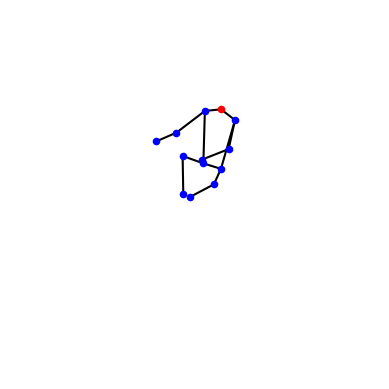

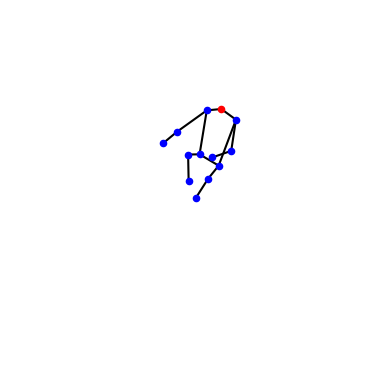

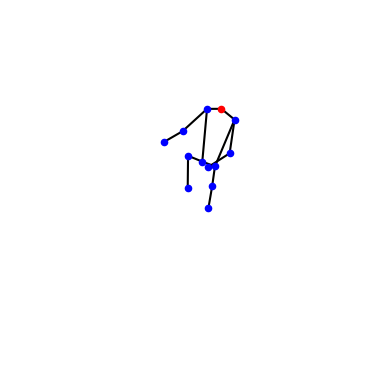

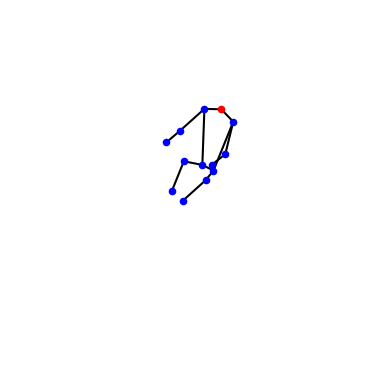

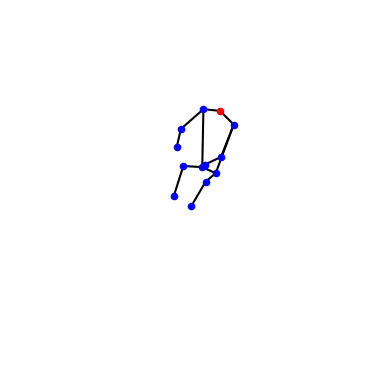

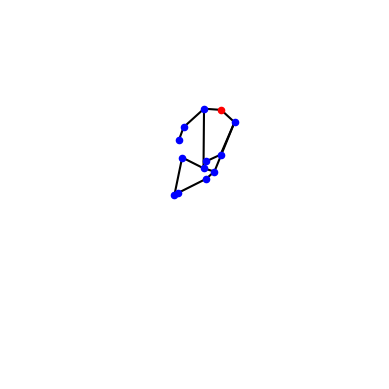

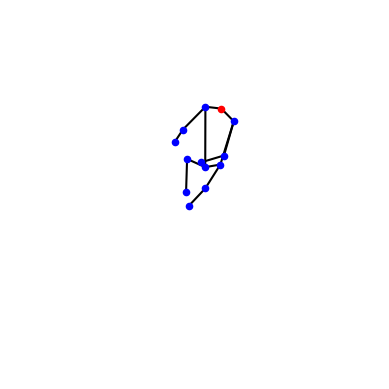

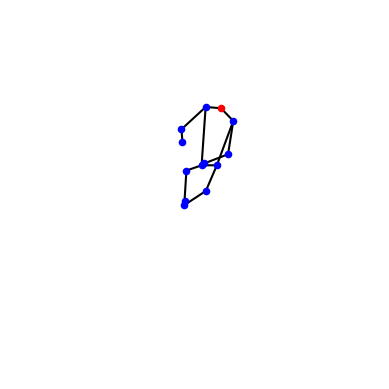

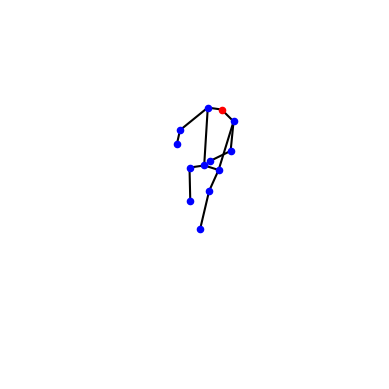

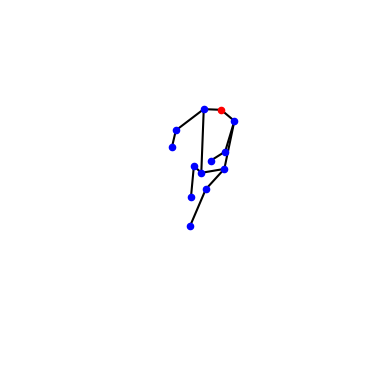

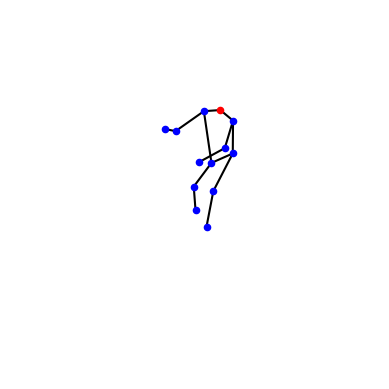

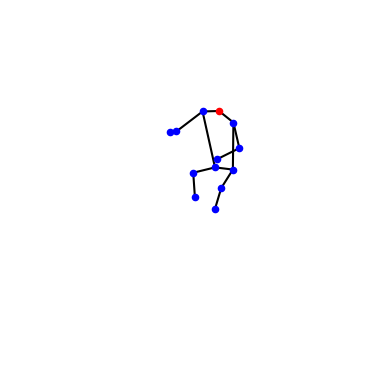

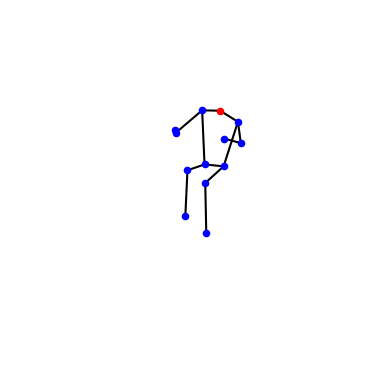

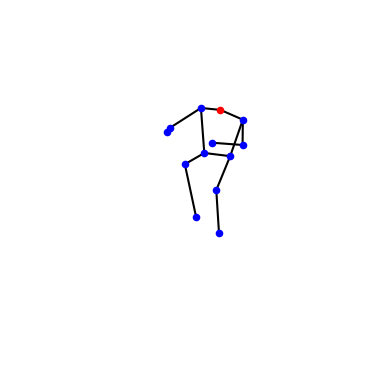

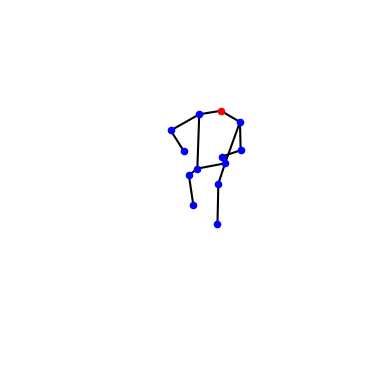

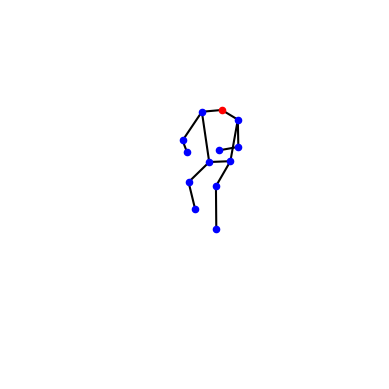

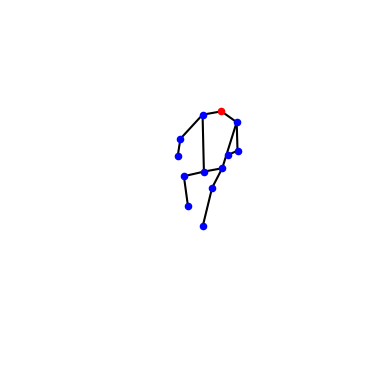

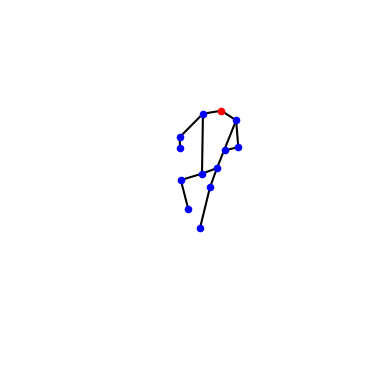

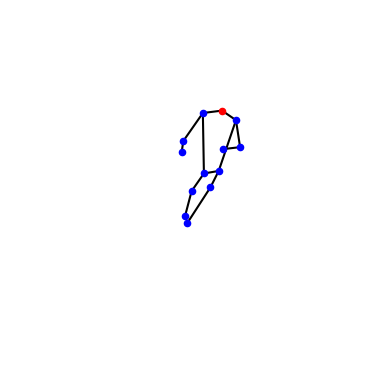

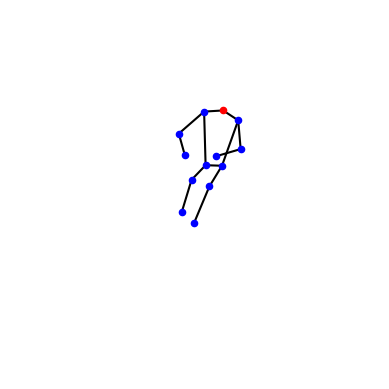

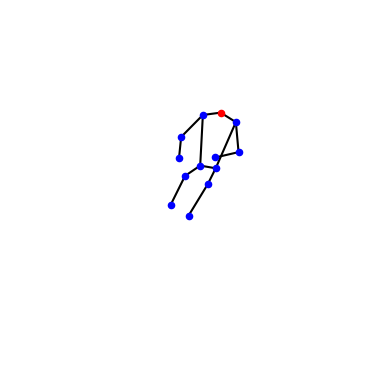

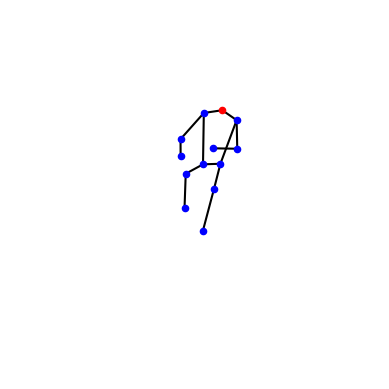

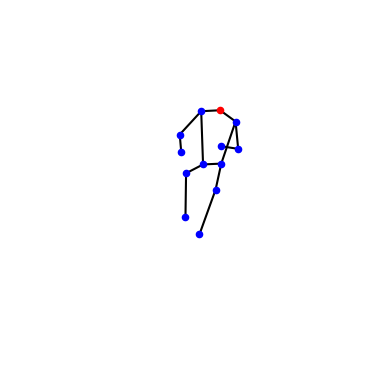

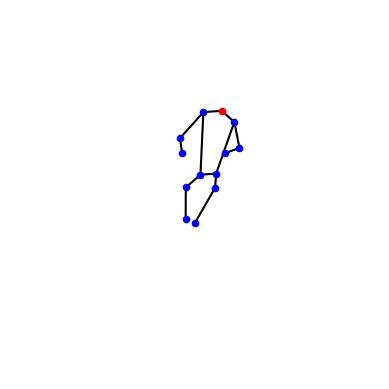

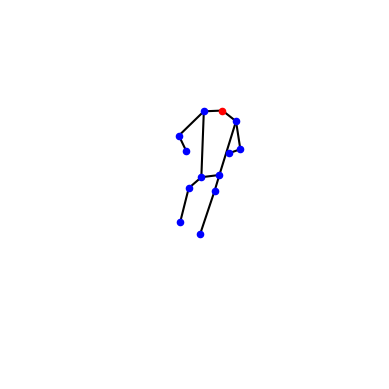

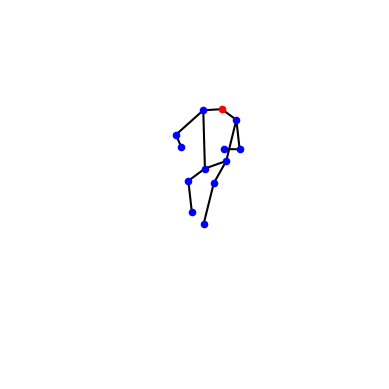

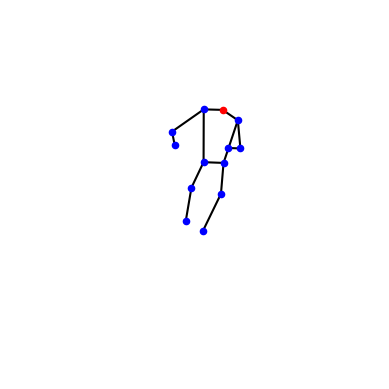

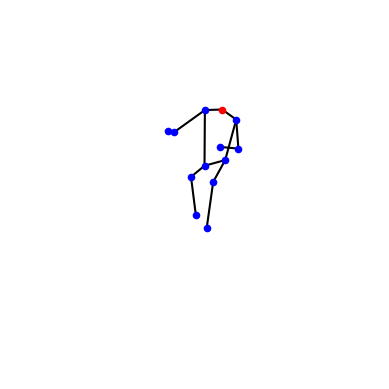

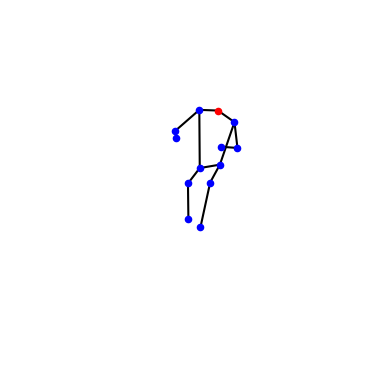

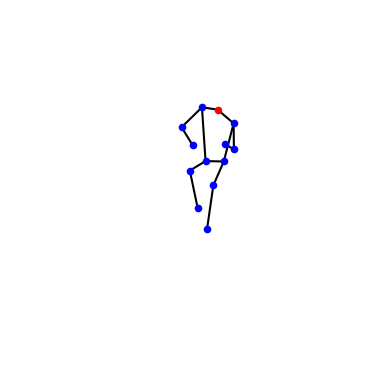

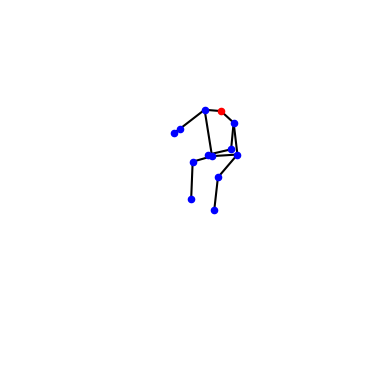

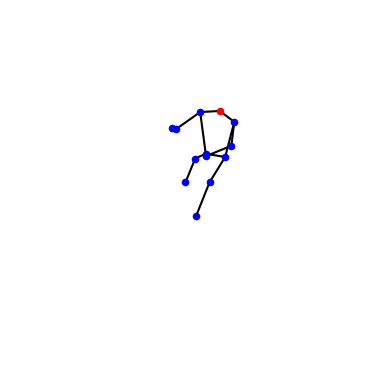

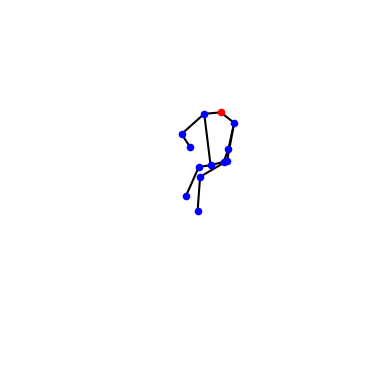

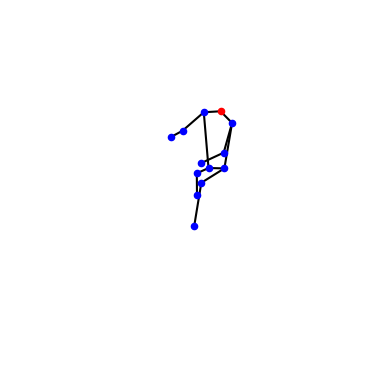

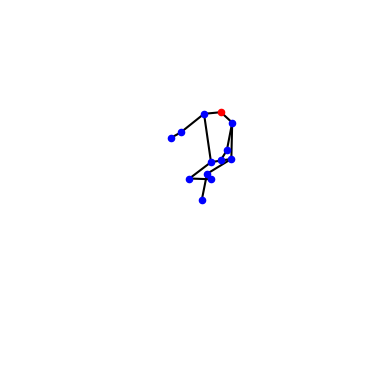

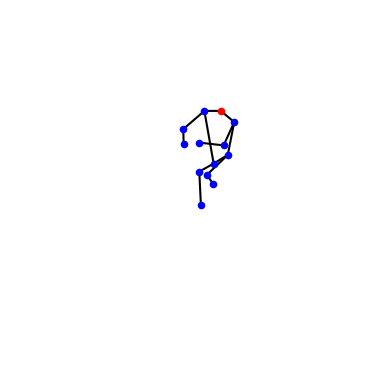

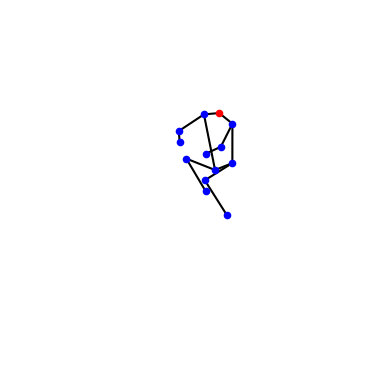

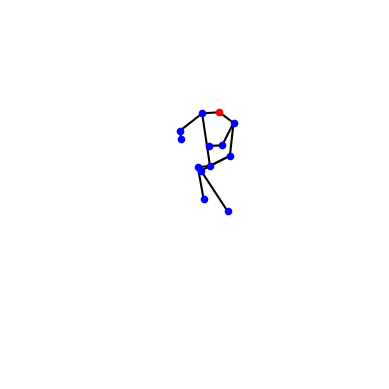

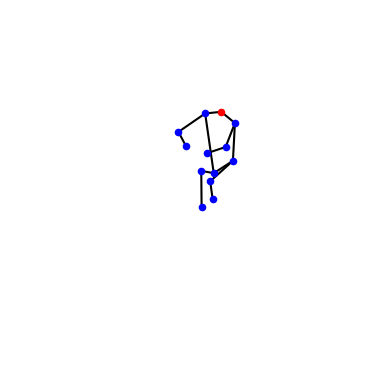

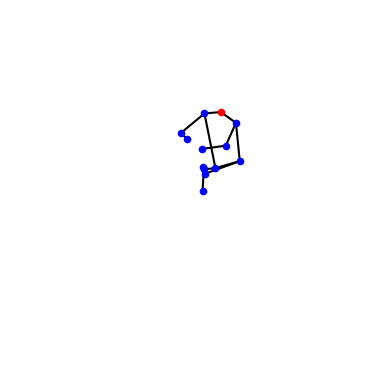

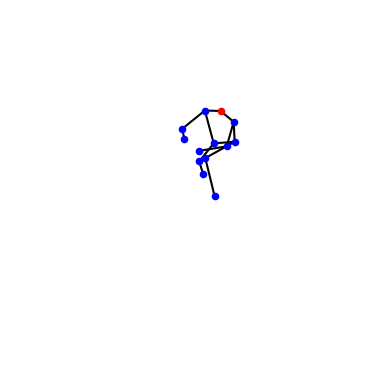

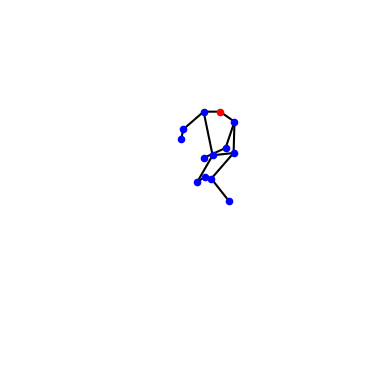

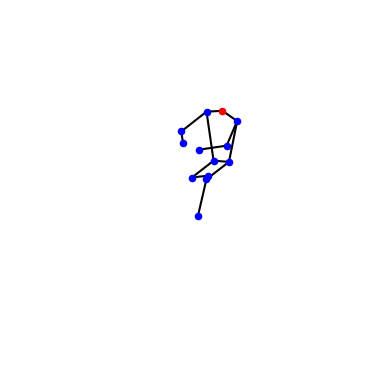

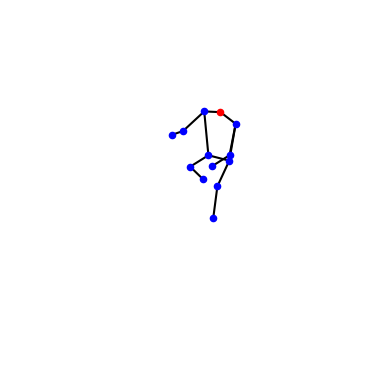

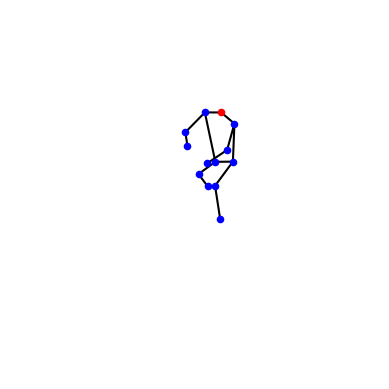

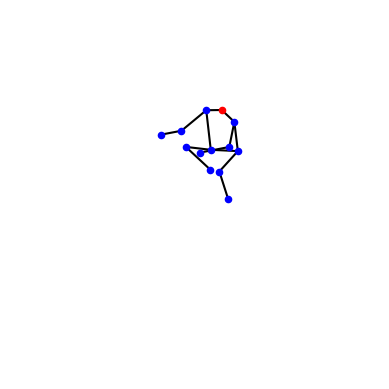

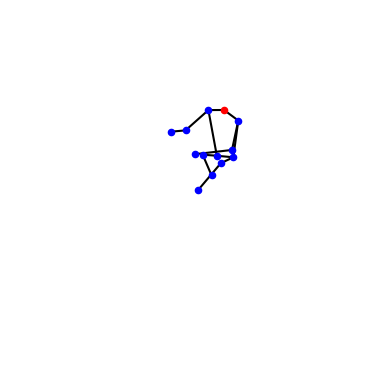

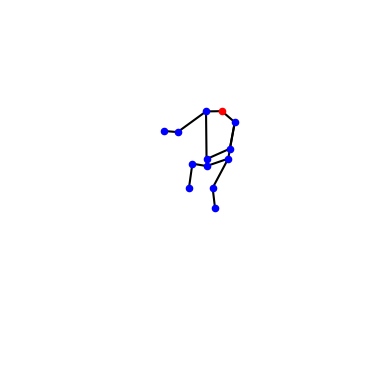

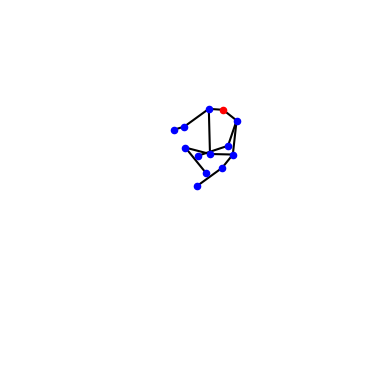

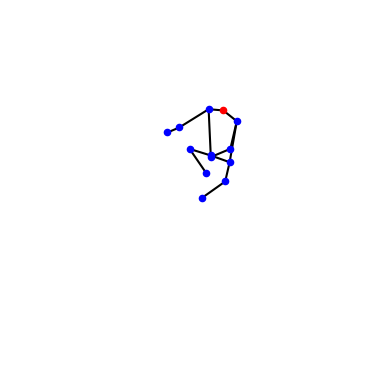

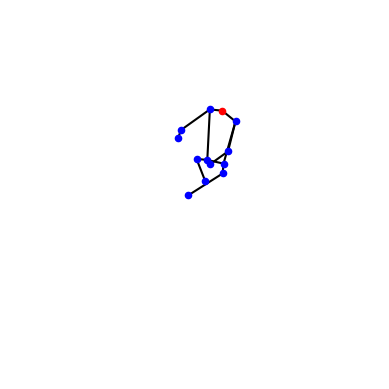

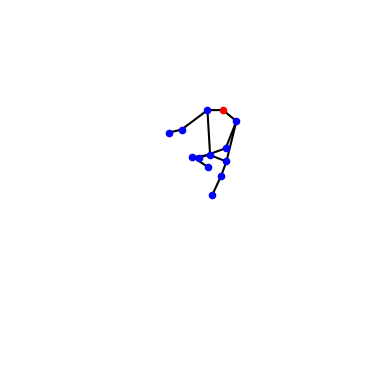

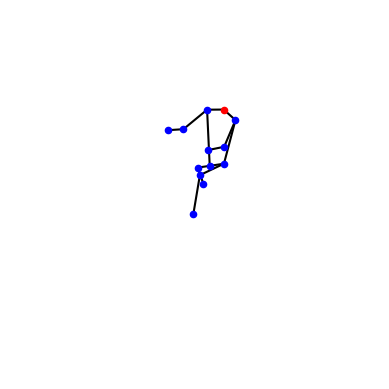

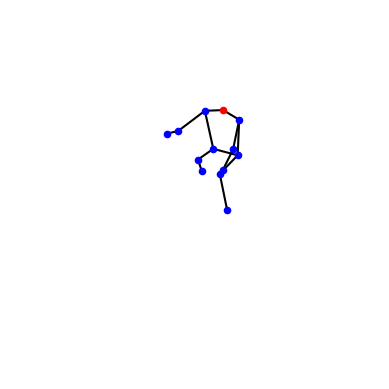

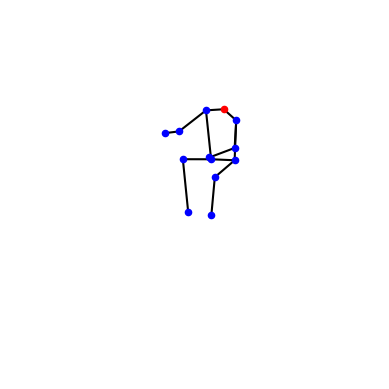

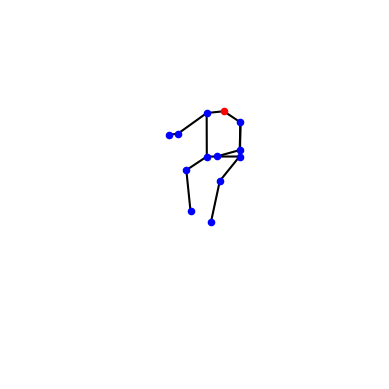

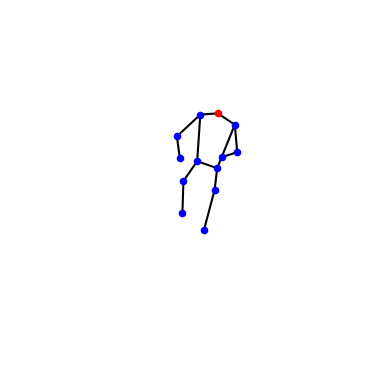

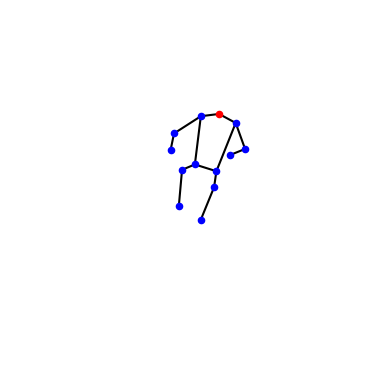

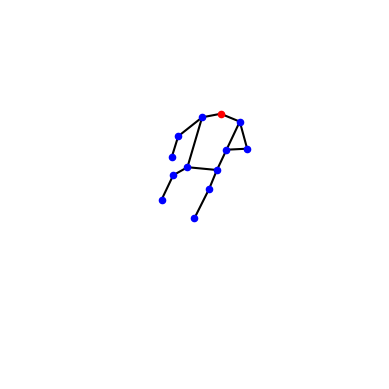

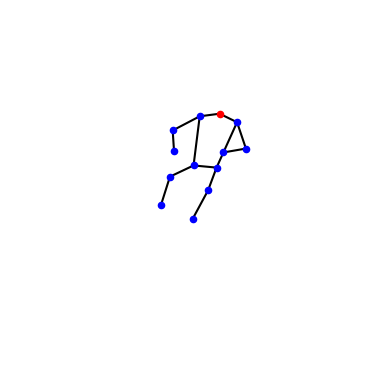

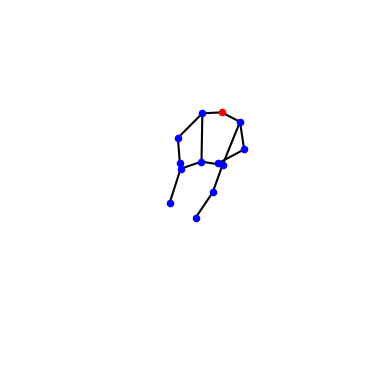

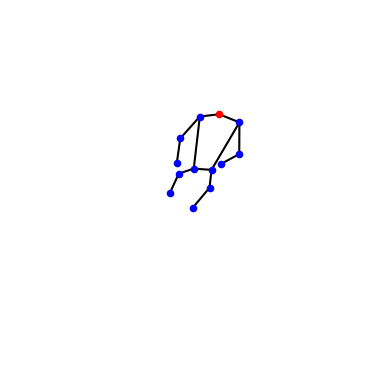

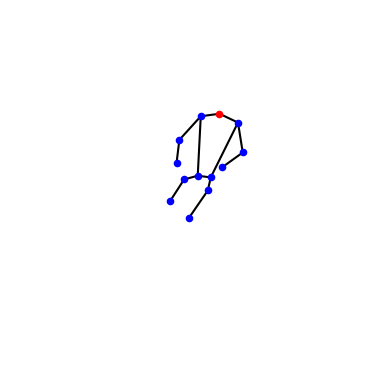

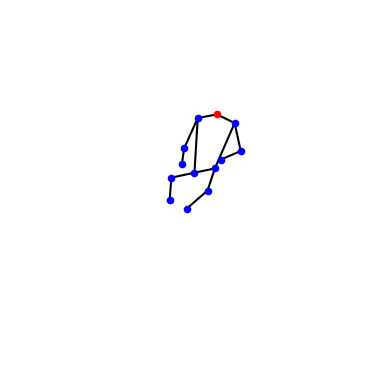

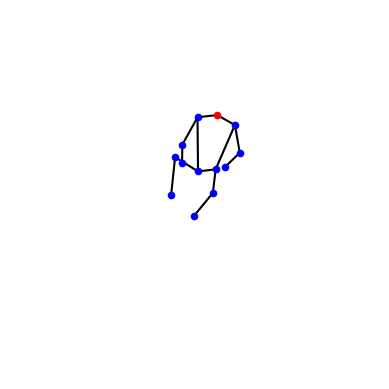

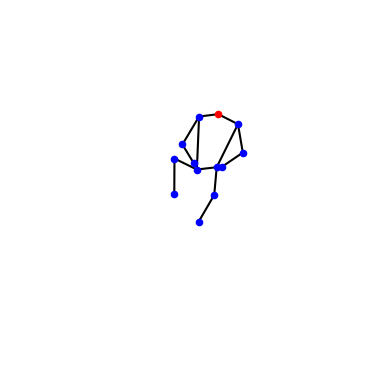

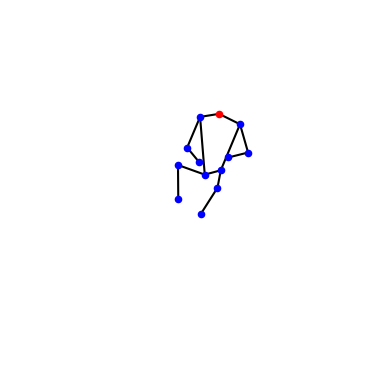

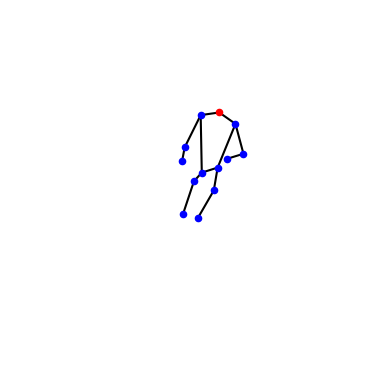

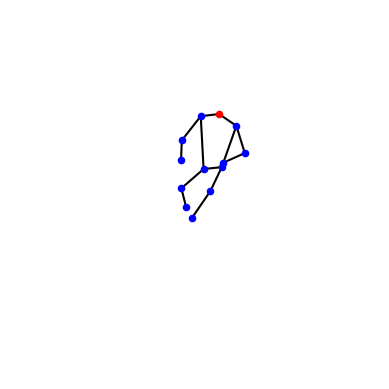

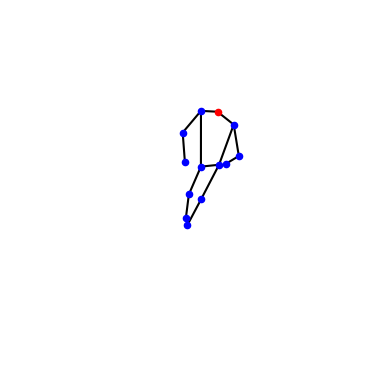

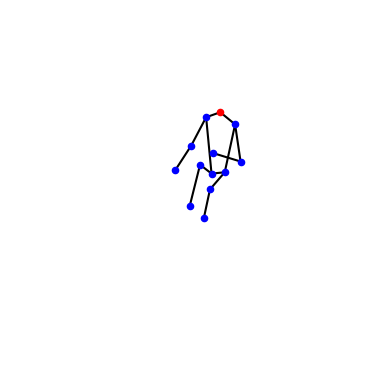

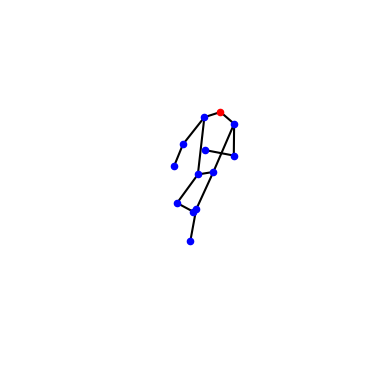

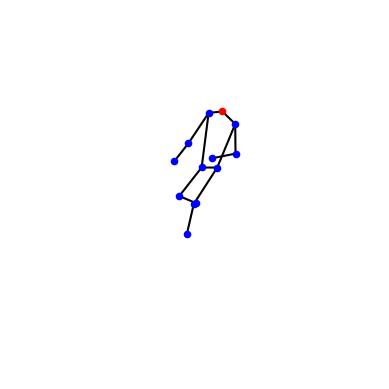

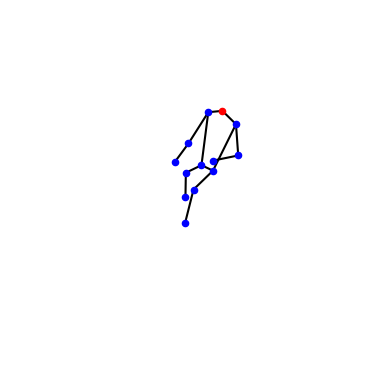

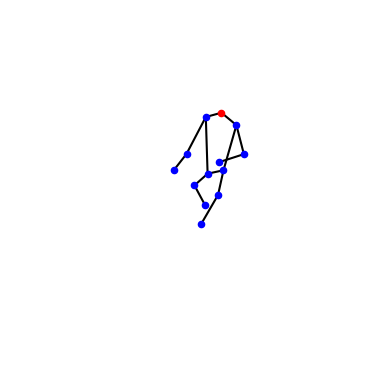

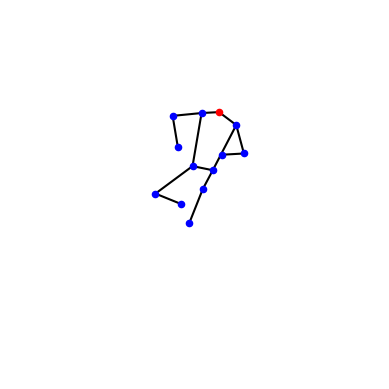

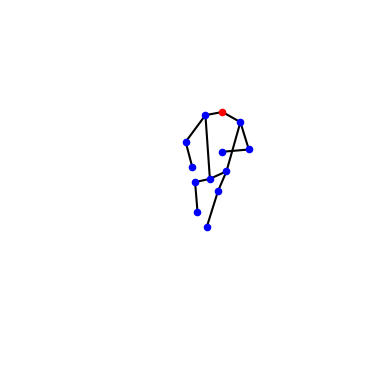

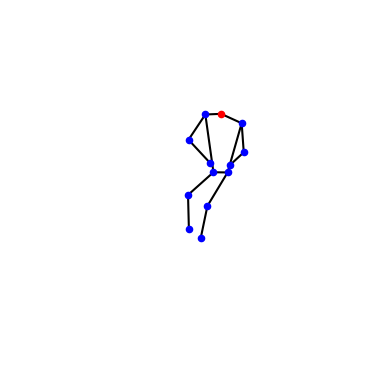

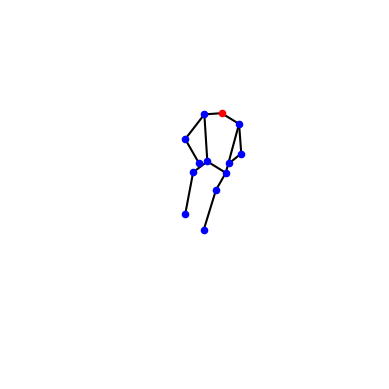

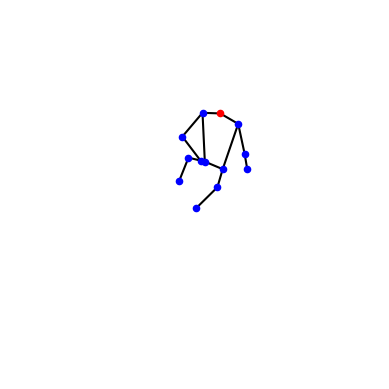

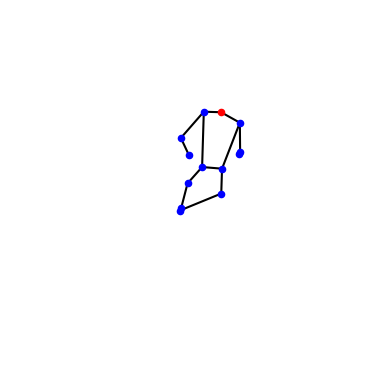

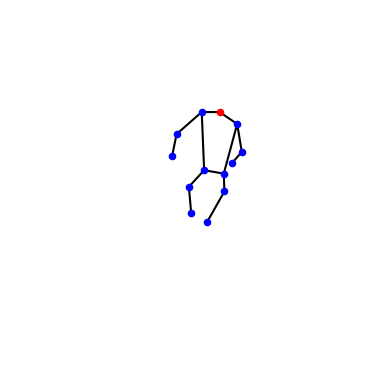

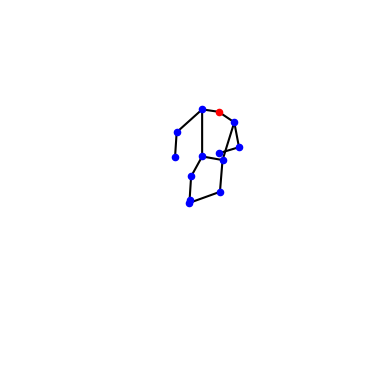

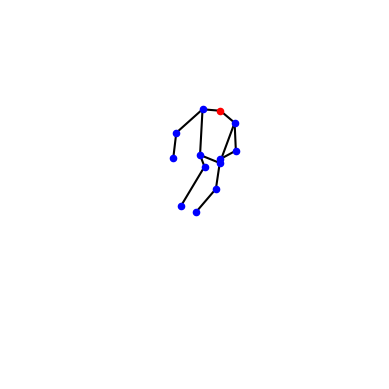

fall


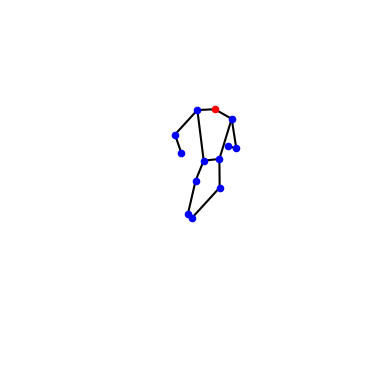

fall


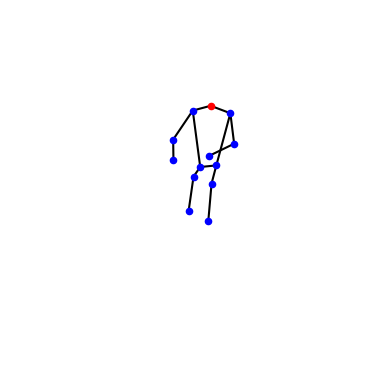

fall


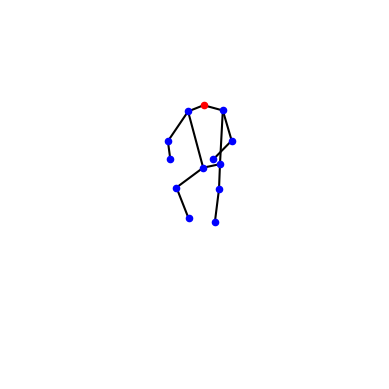

fall


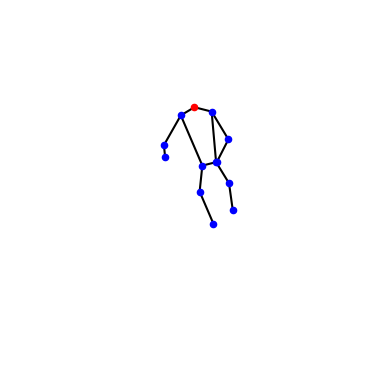

fall


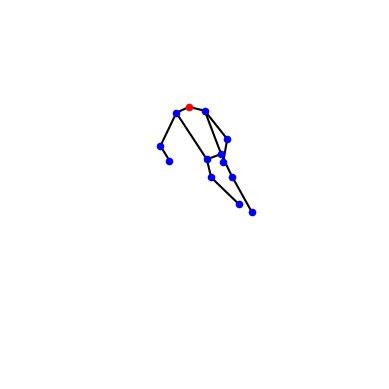

fall


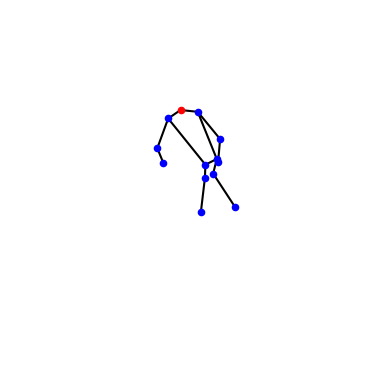

fall


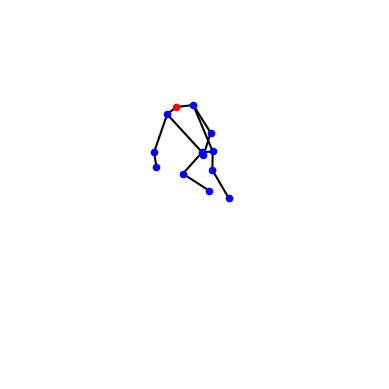

fall


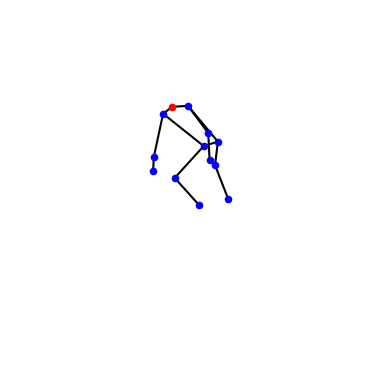

fall


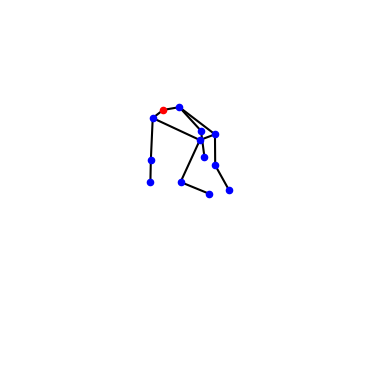

fall


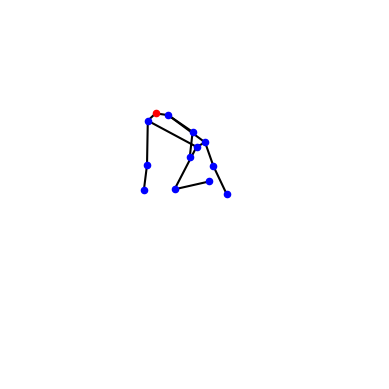

fall


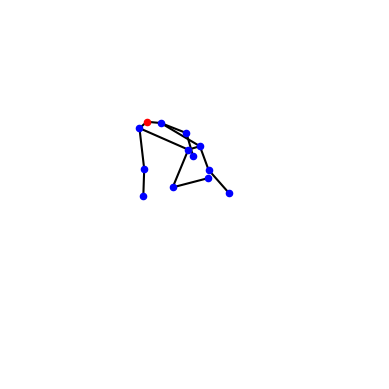

fall


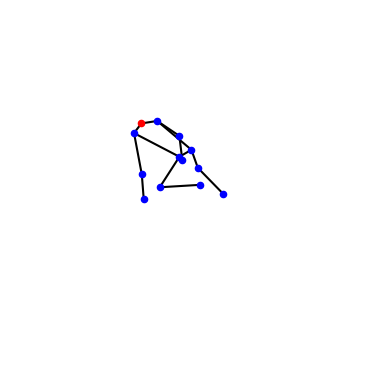

fall


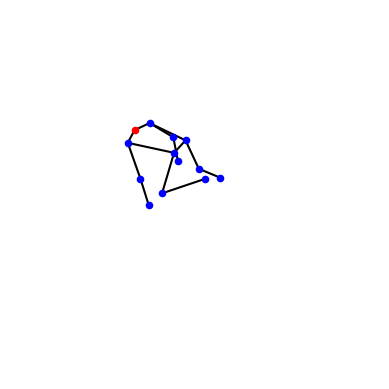

fall


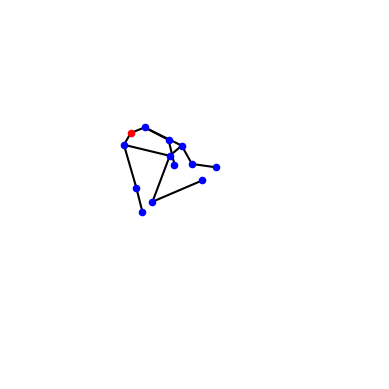

fall


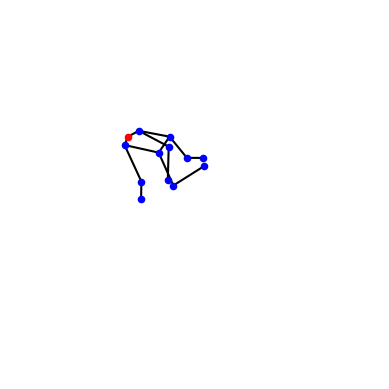

fall


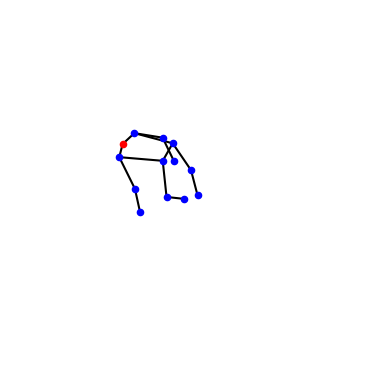

fall


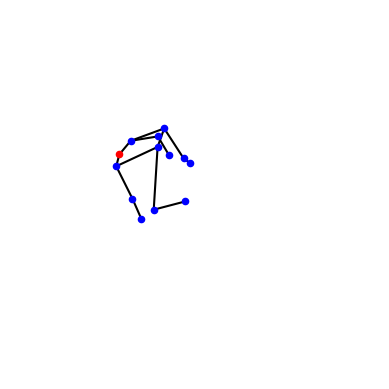

fall


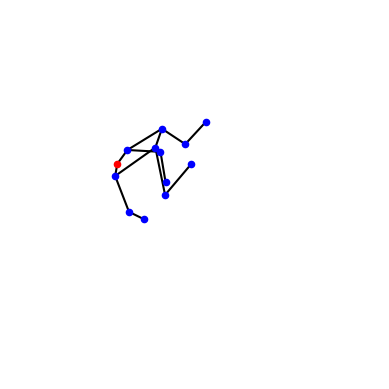

fall


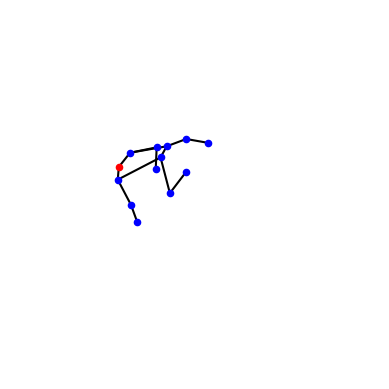

fall


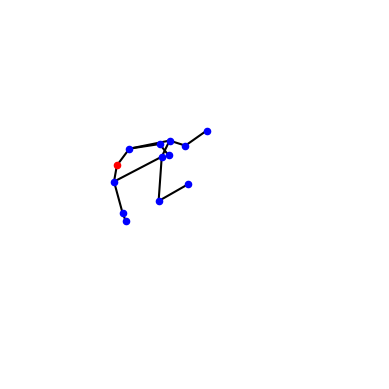

fall


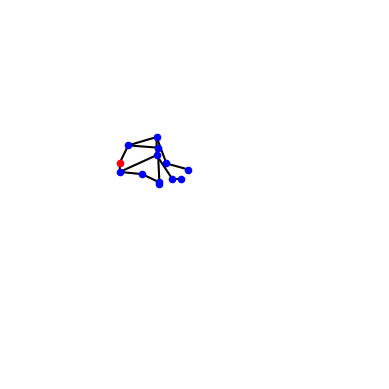

fall


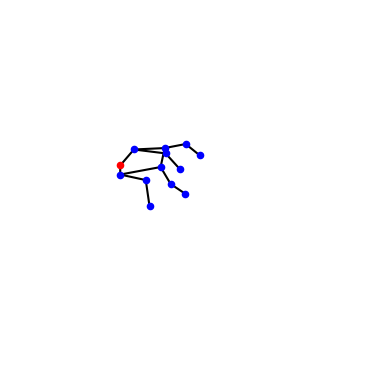

fall


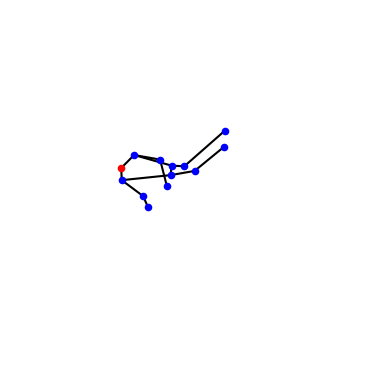

fall


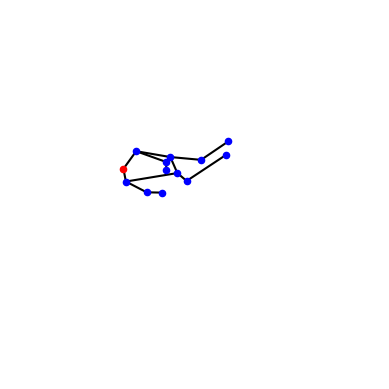

fall


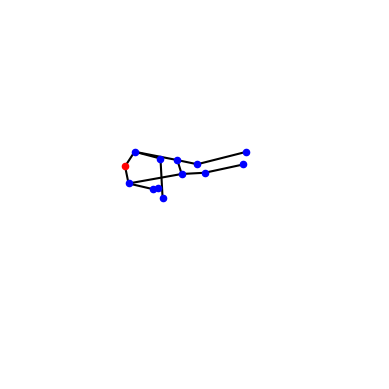

fall


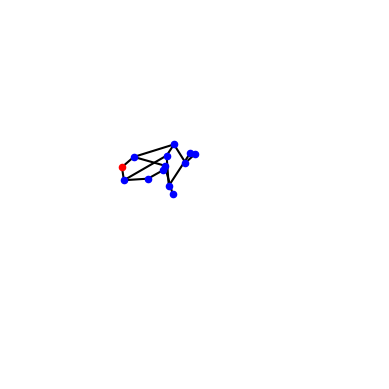

fall


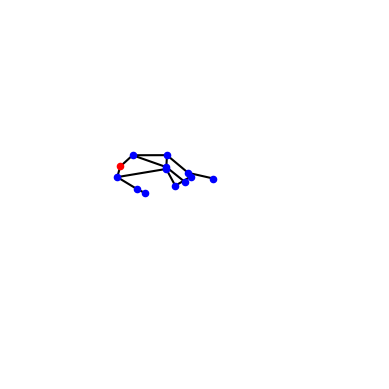

fall


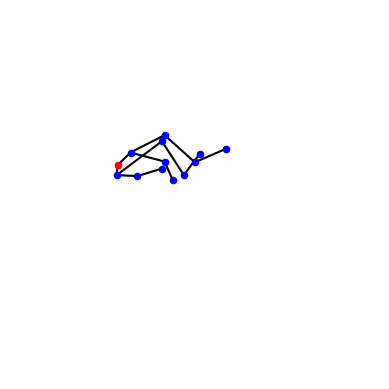

fall


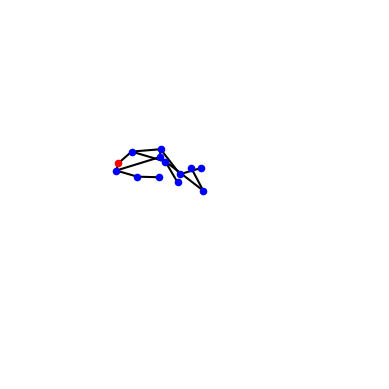

fall


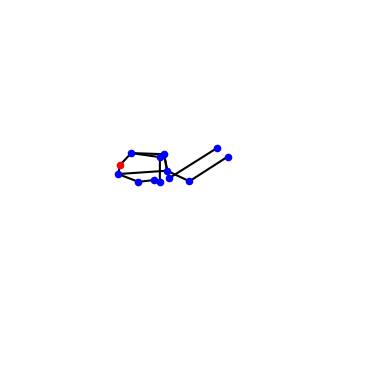

fall


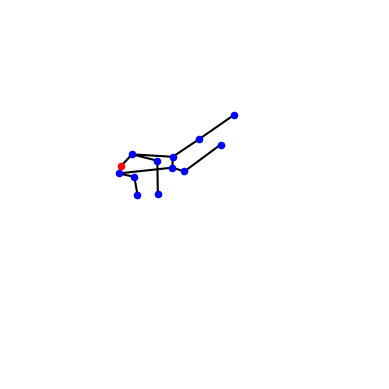

fall


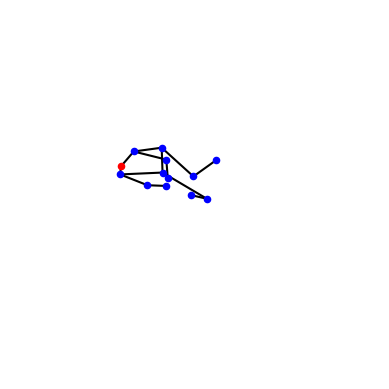

fall


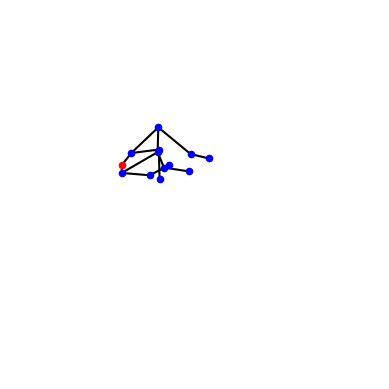

fall


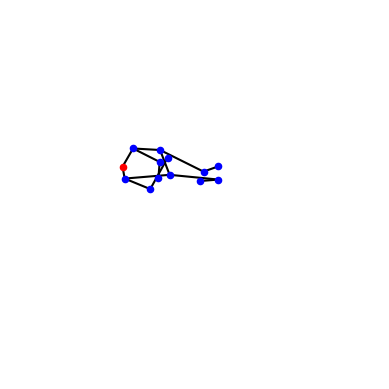

fall


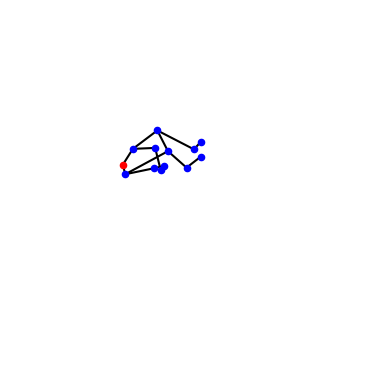

fall


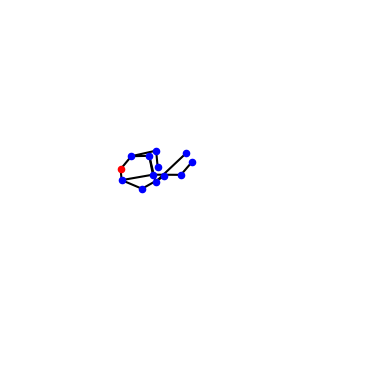

fall


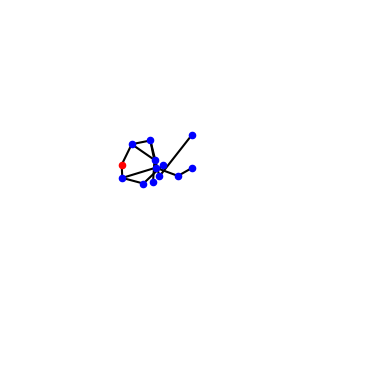

fall


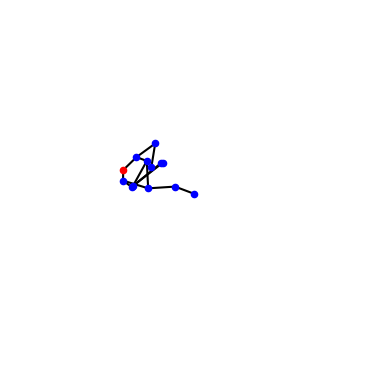

fall


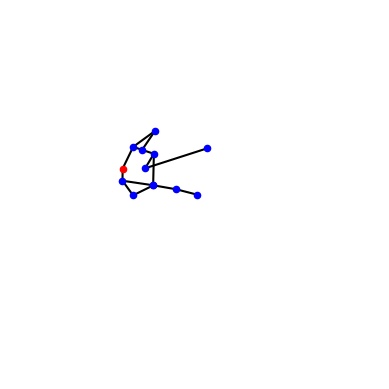

fall


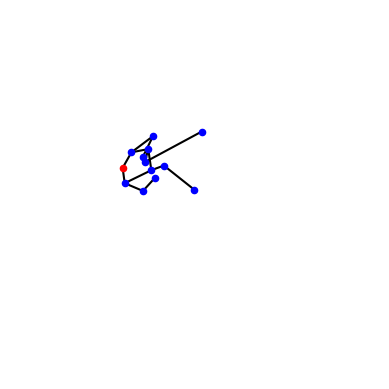

fall


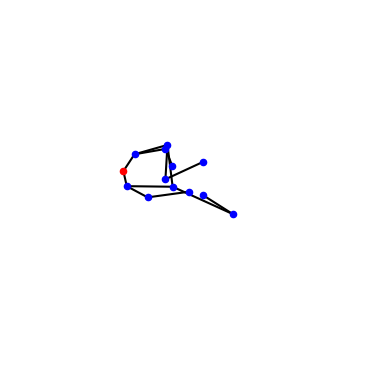

fall


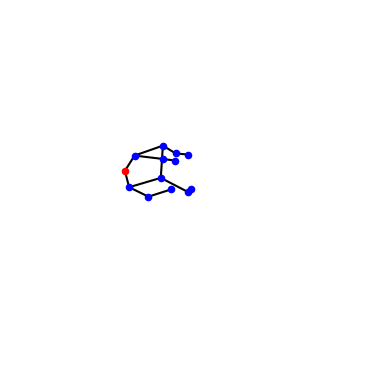

fall


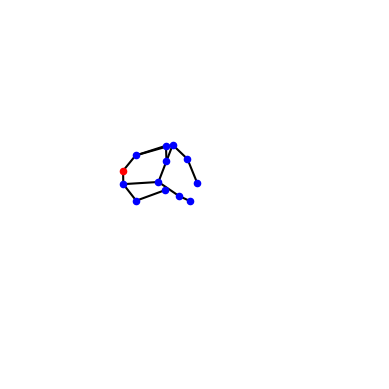

fall


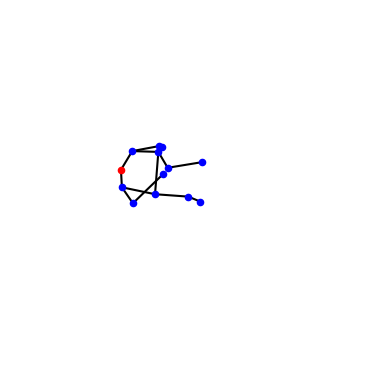

fall


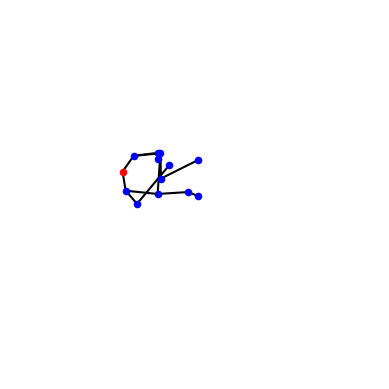

fall


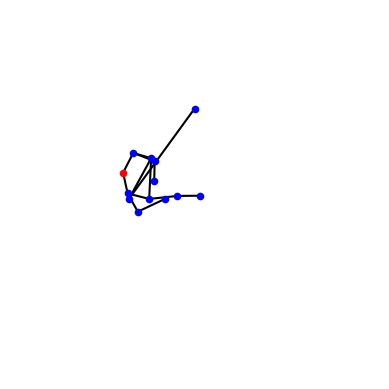

fall


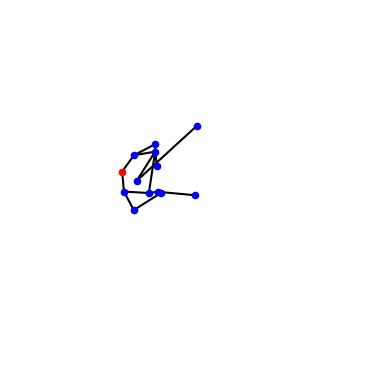

fall


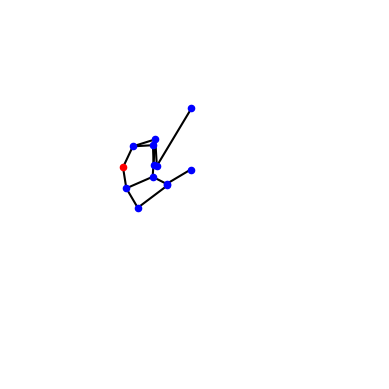

fall


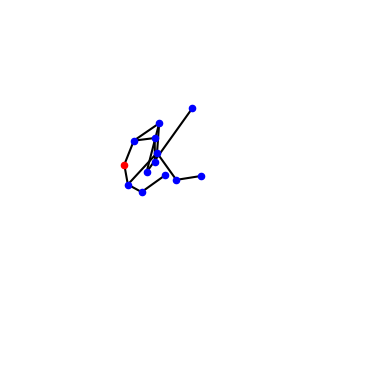

fall


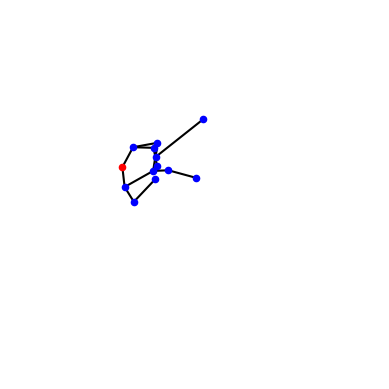

fall


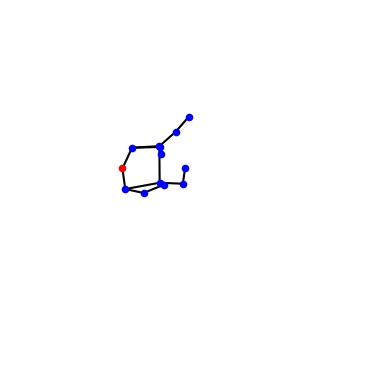

fall


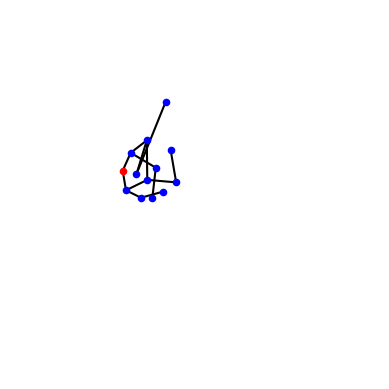

fall


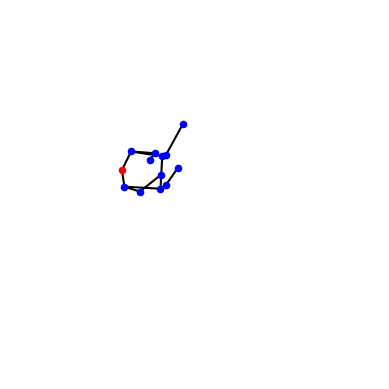

fall


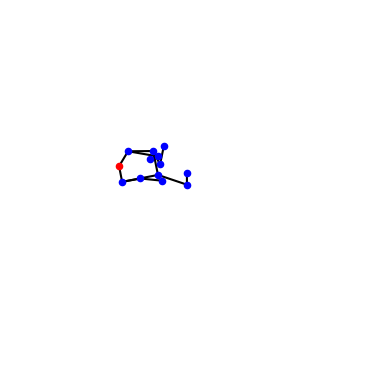

fall


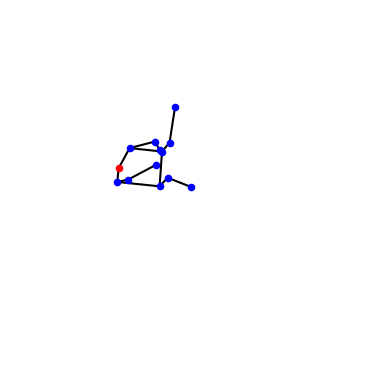

fall


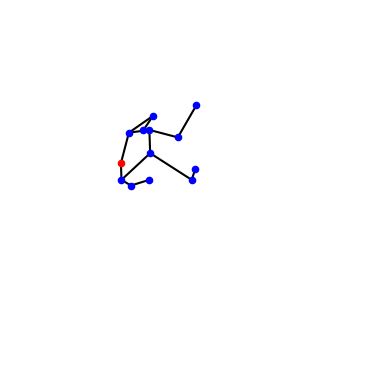

fall


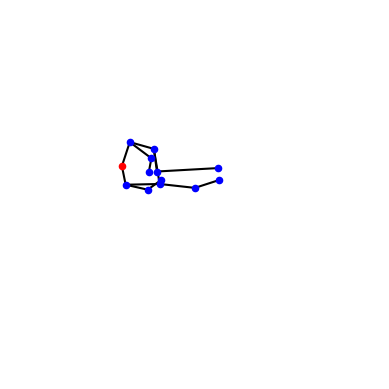

fall


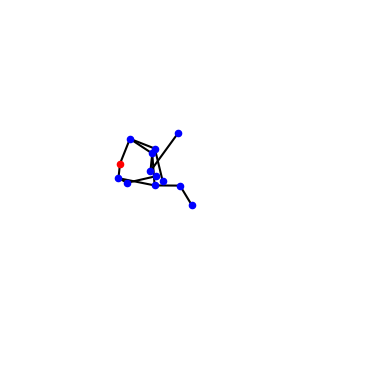

fall


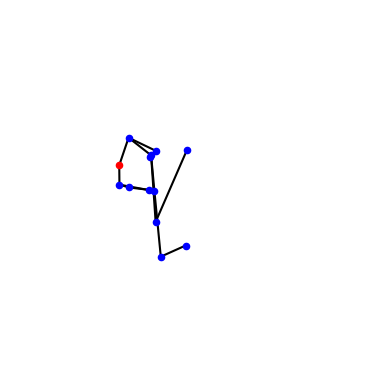

fall


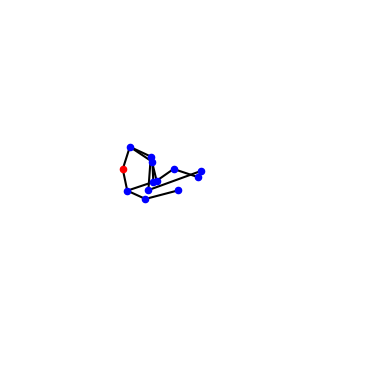

fall


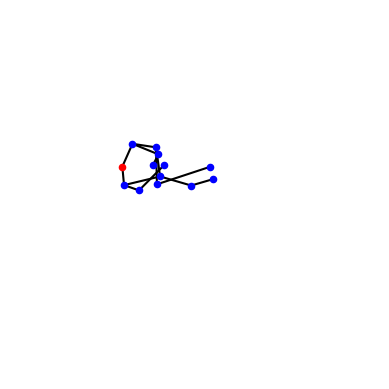

fall


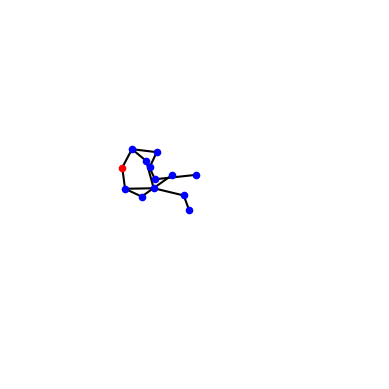

fall


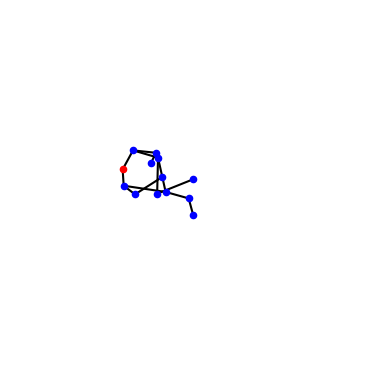

fall


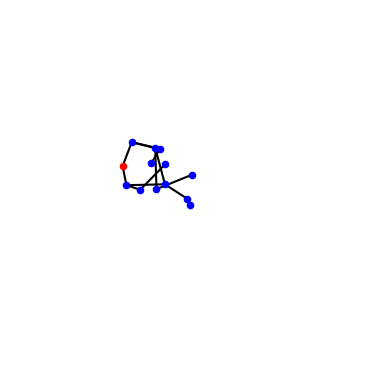

fall


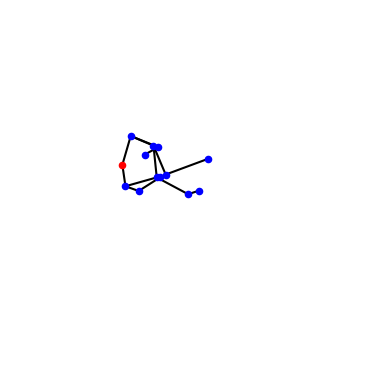

fall


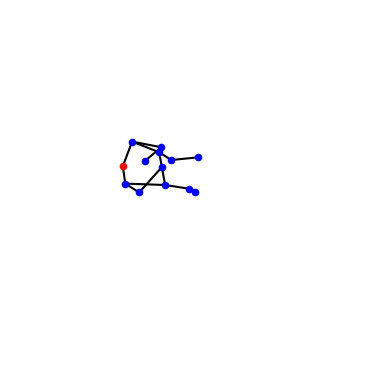

fall


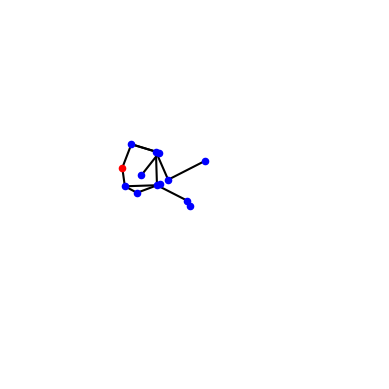

fall


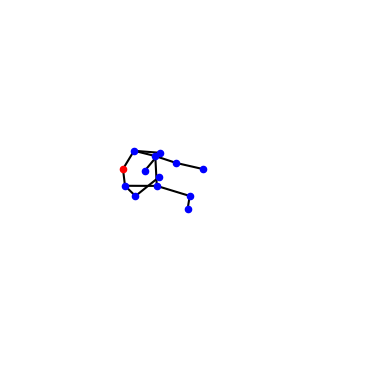

fall


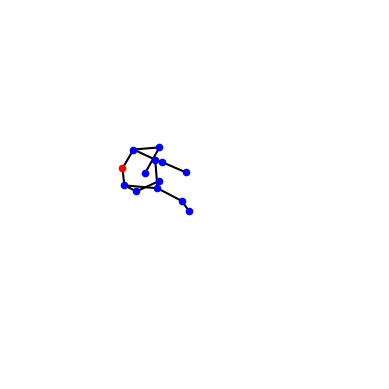

fall


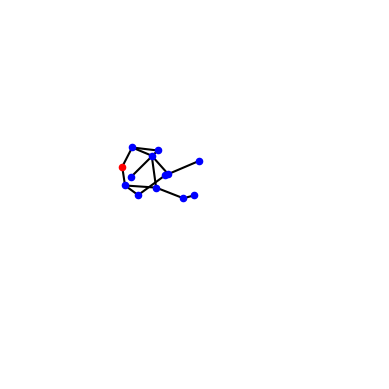

fall


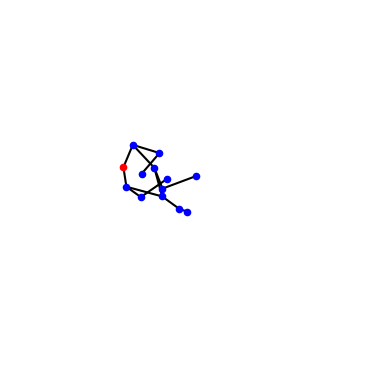

fall


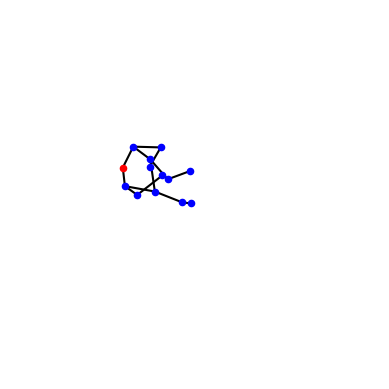

fall


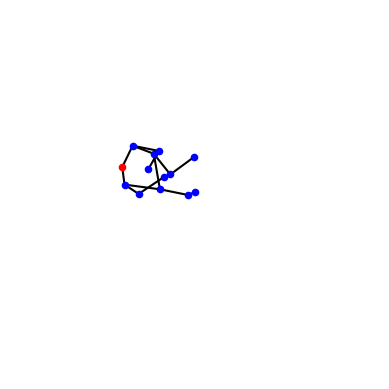

fall


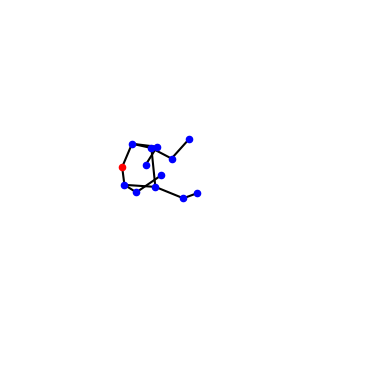

fall


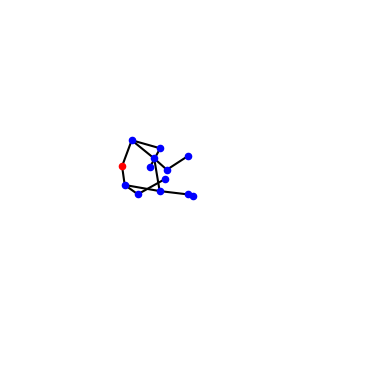

fall


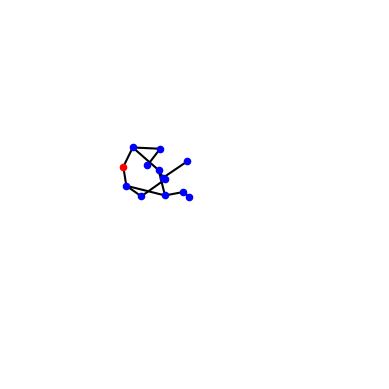

fall


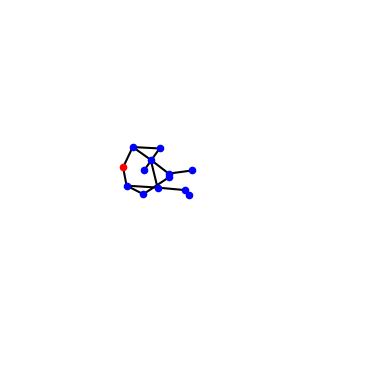

fall


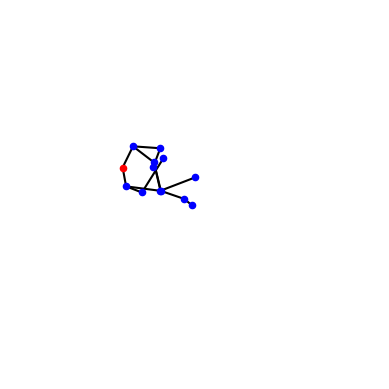

fall


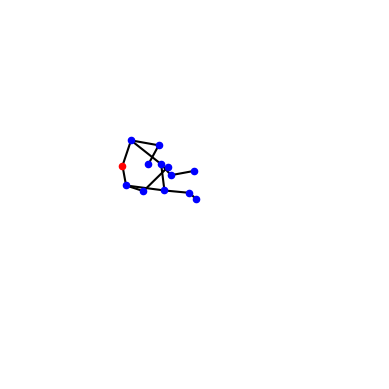

fall


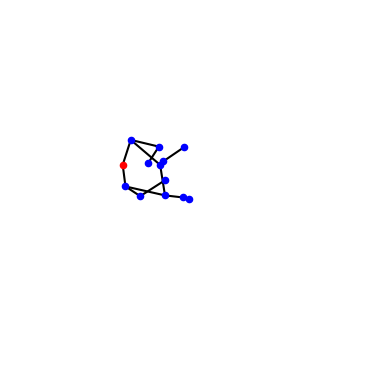

fall


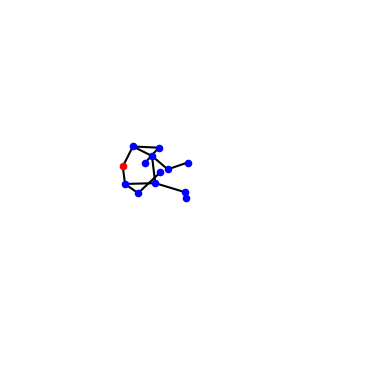

fall


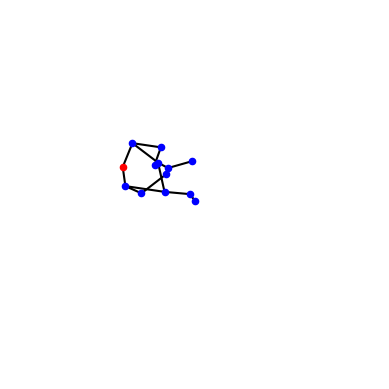

fall


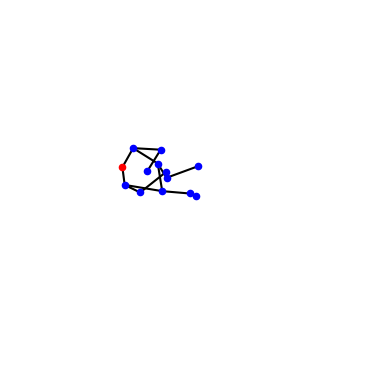

fall


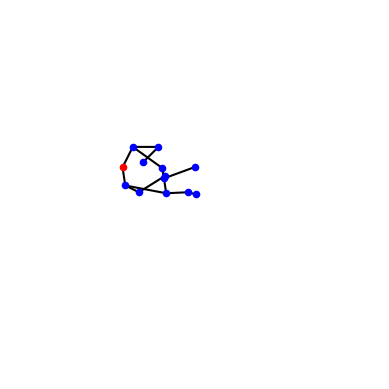

fall


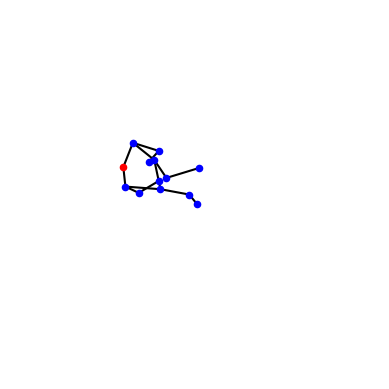

fall


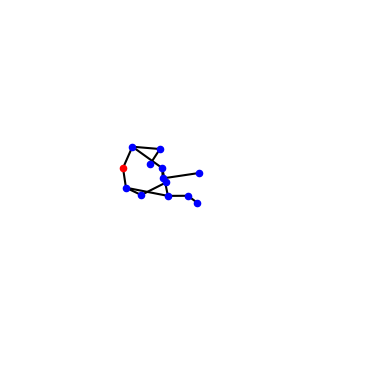

fall


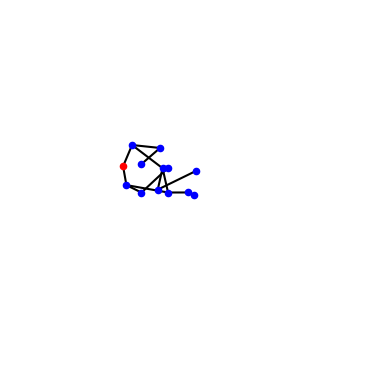

fall


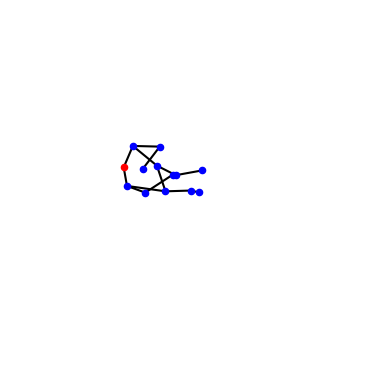

fall


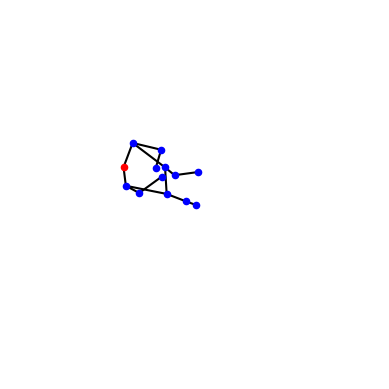

fall


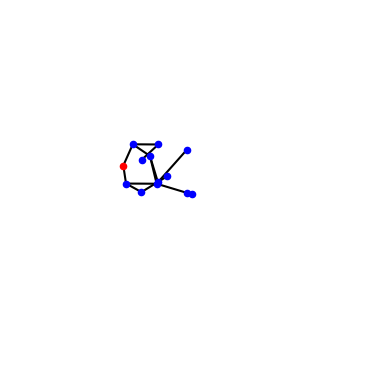

fall


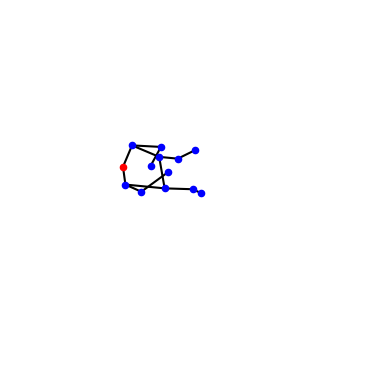

fall


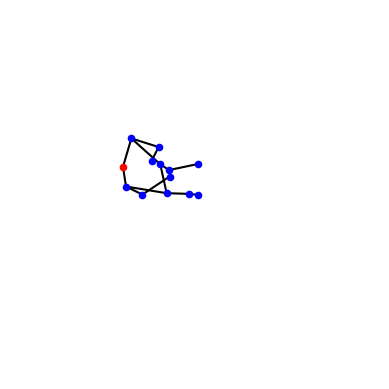

fall


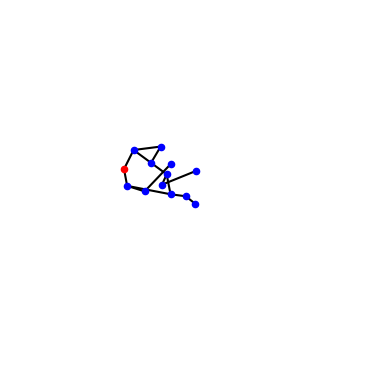

fall


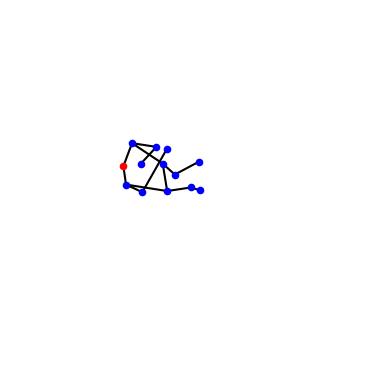

fall


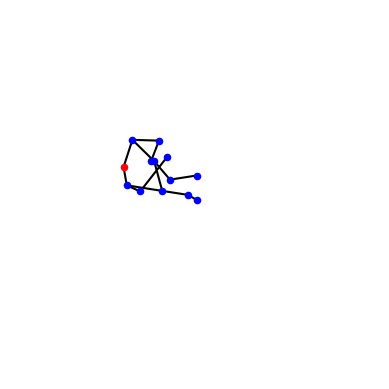

fall


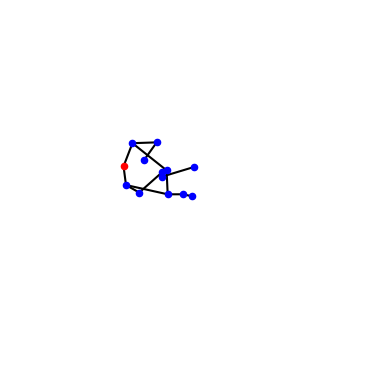

fall


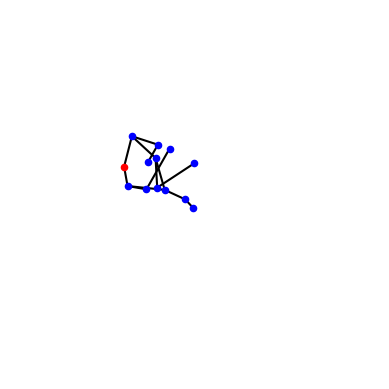

fall


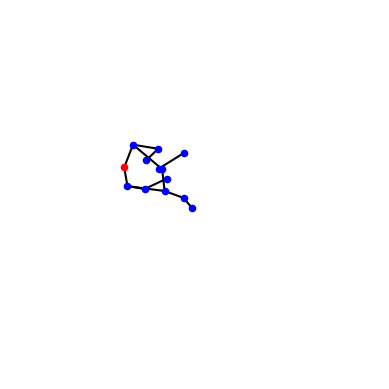

fall


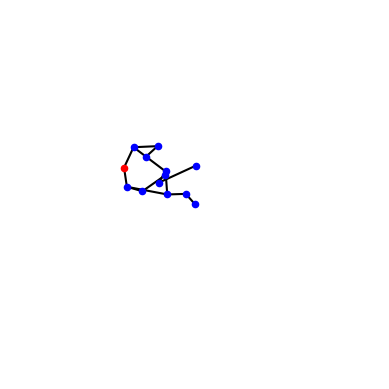

fall


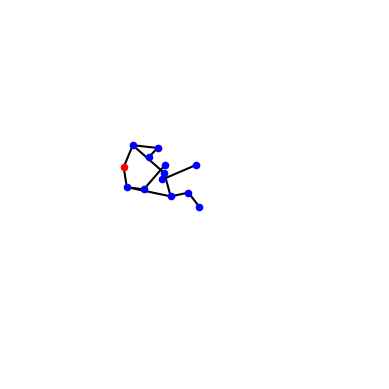

fall


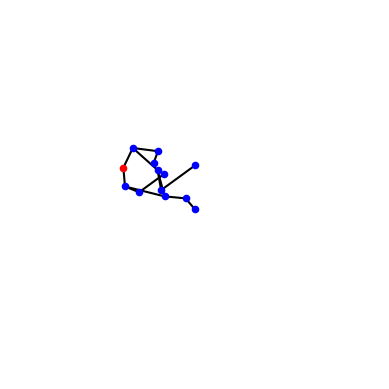

fall


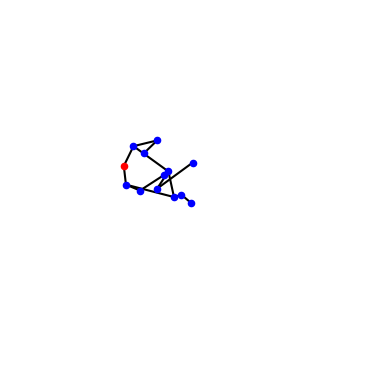

fall


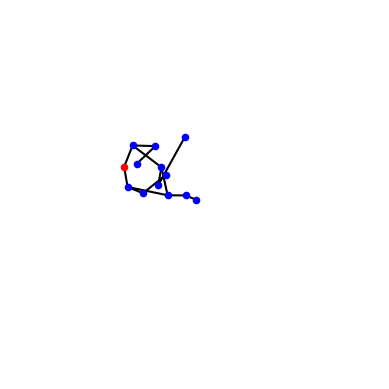

fall


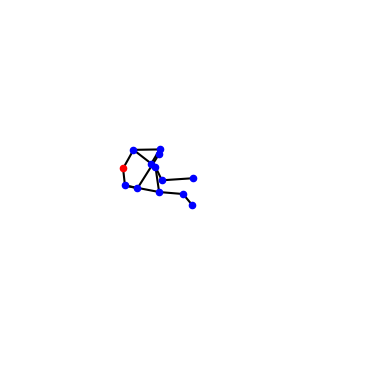

fall


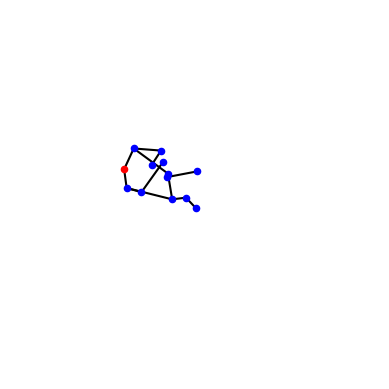

fall


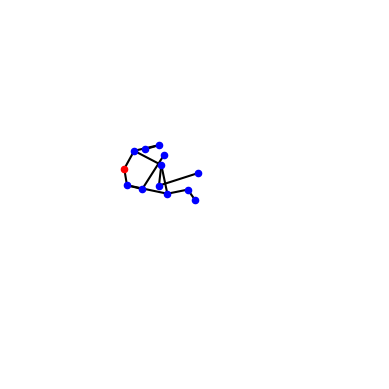

fall


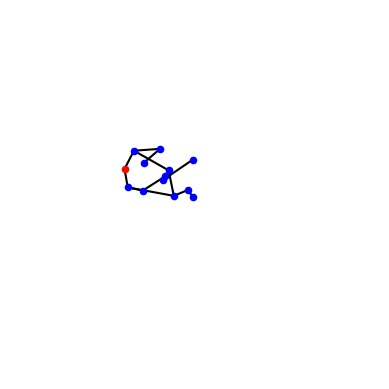

fall


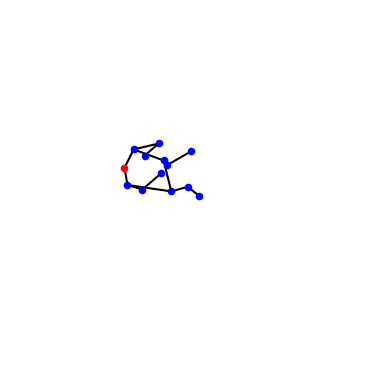

fall


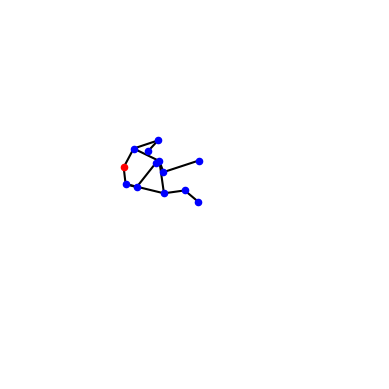

fall


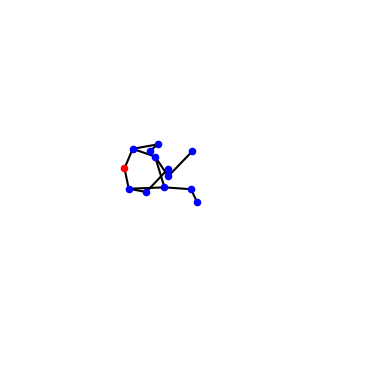

fall


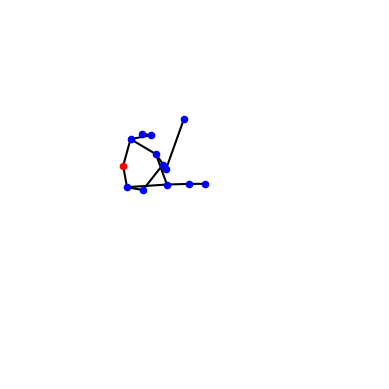

fall


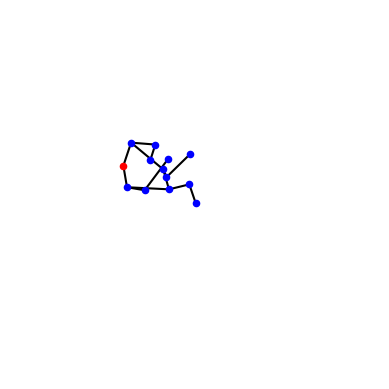

fall


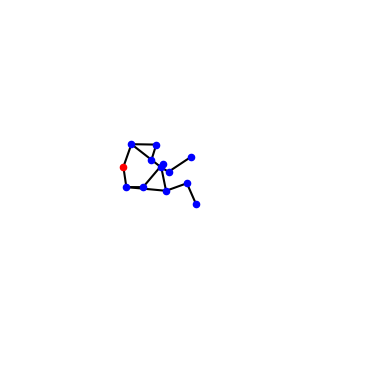

fall


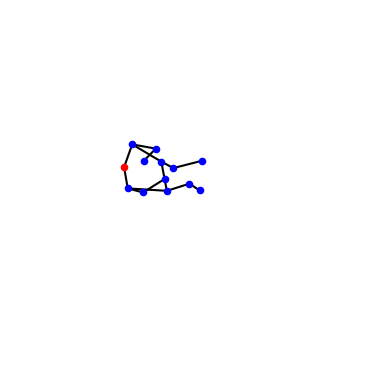

fall


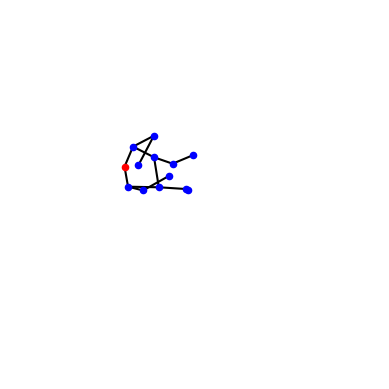

fall


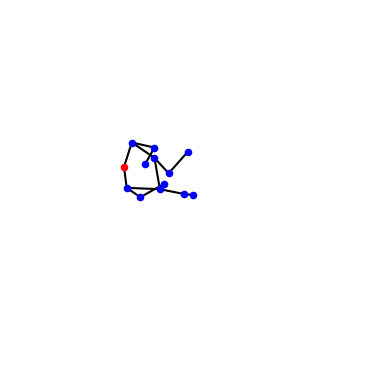

fall


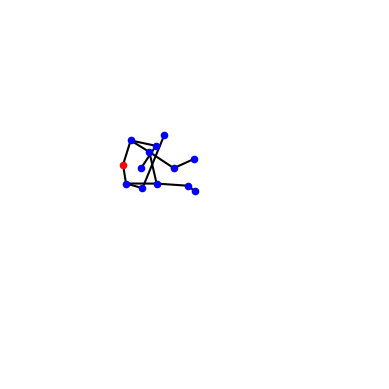

fall


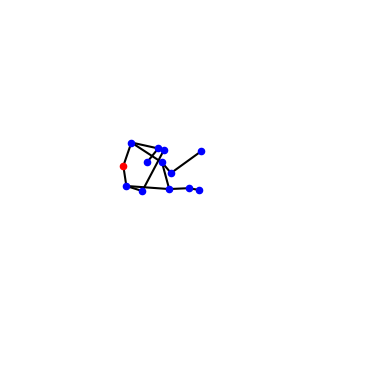

fall


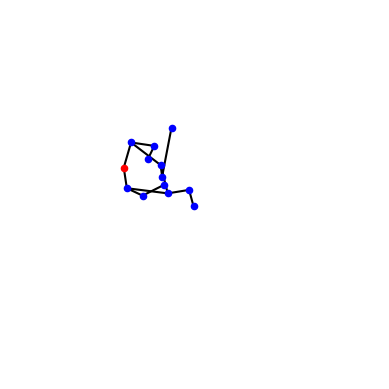

fall


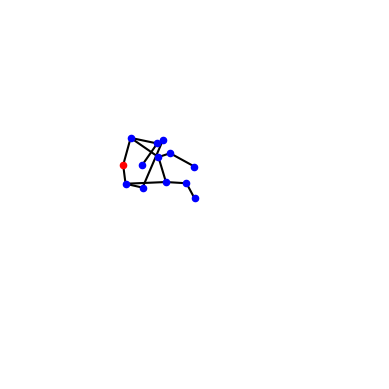

fall


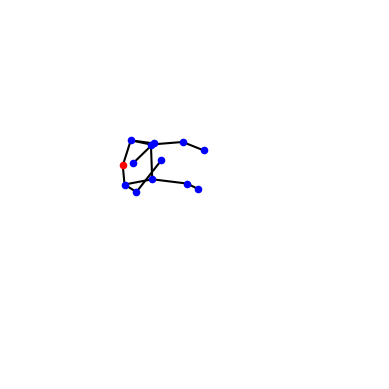

fall


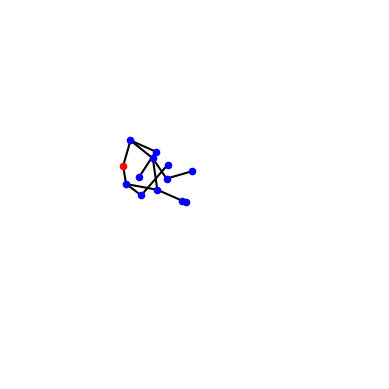

fall


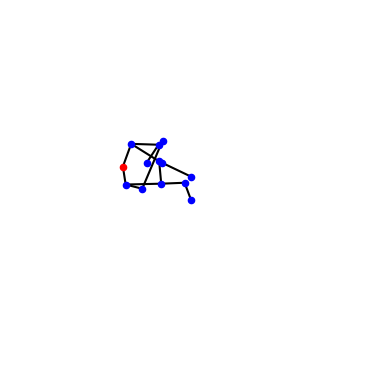

fall


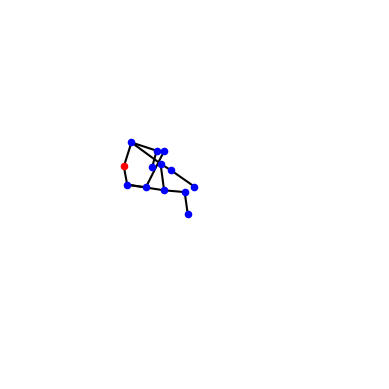

fall


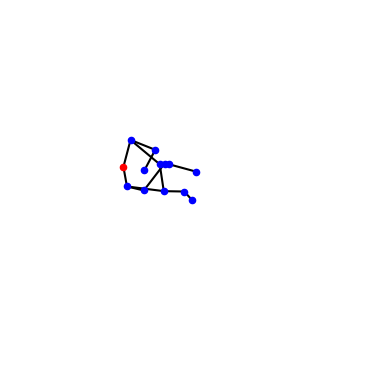

fall


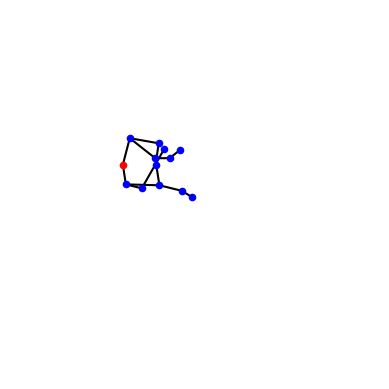

fall


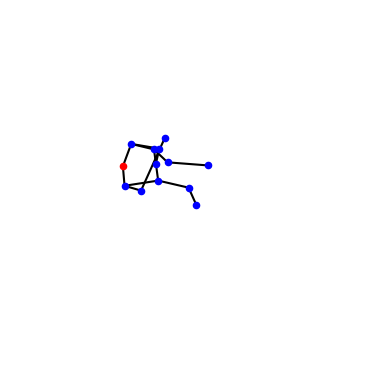

fall


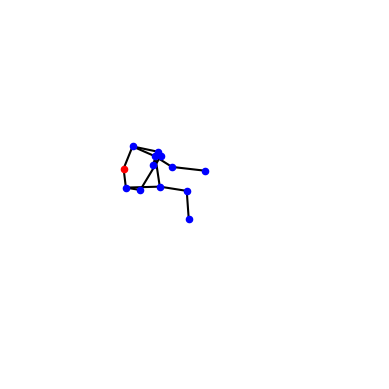

fall


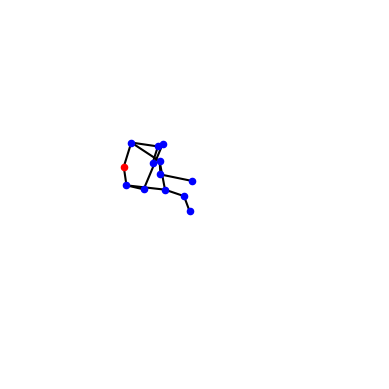

fall


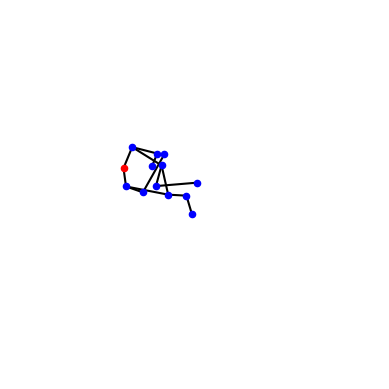

fall


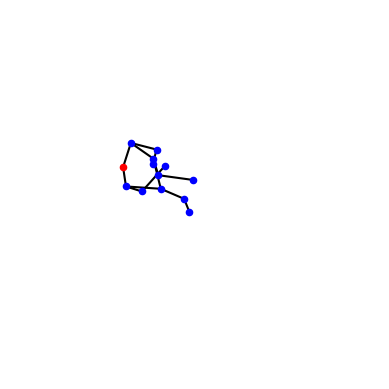

fall


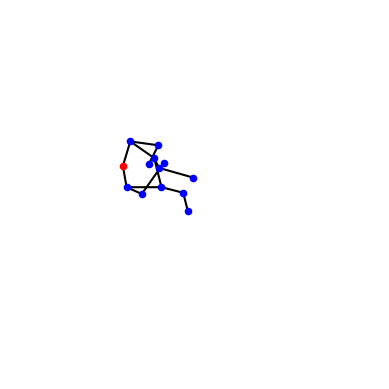

fall


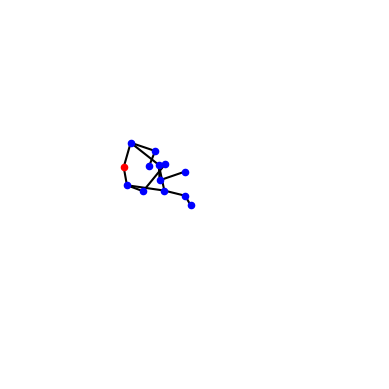

fall


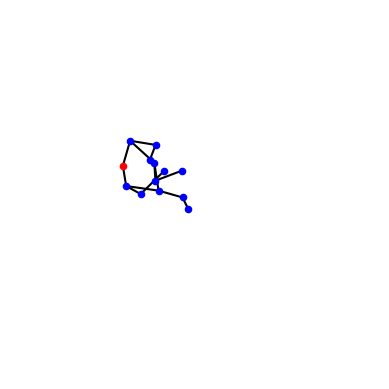

fall


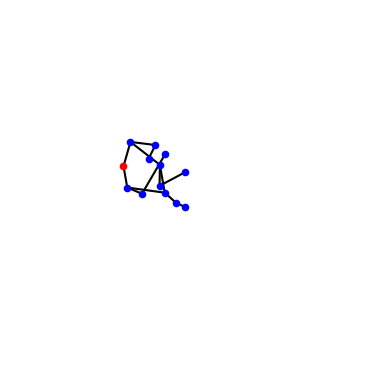

fall


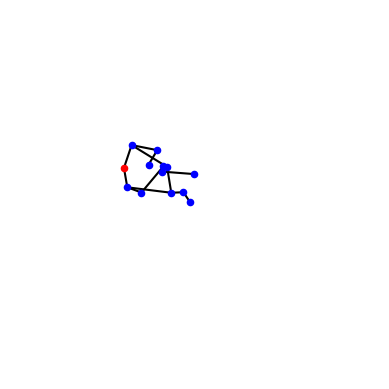

fall


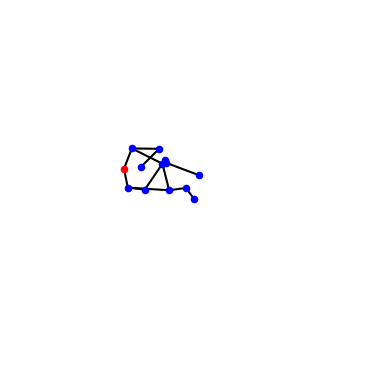

fall


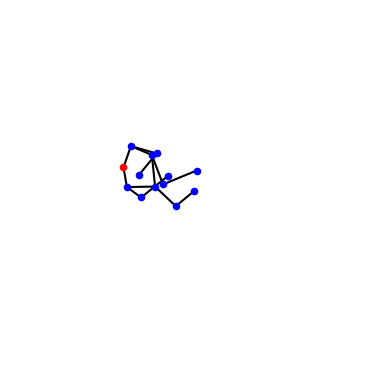

fall


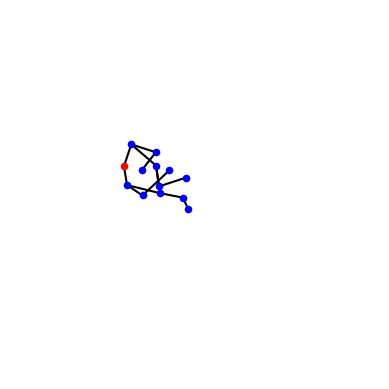

fall


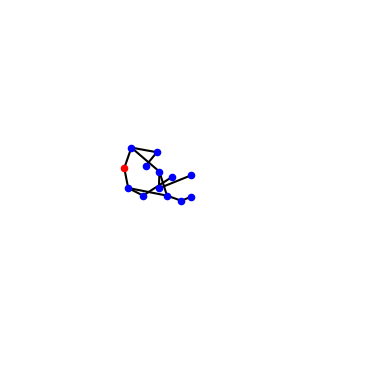

fall


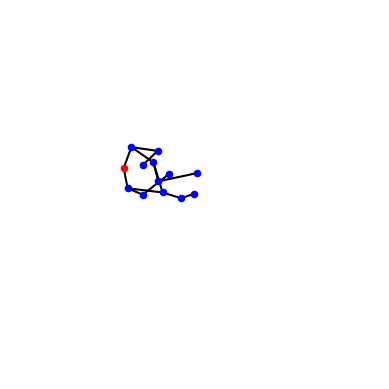

fall


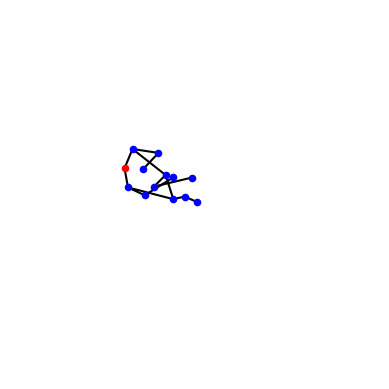

fall


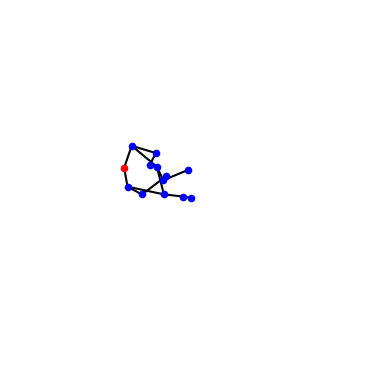

fall


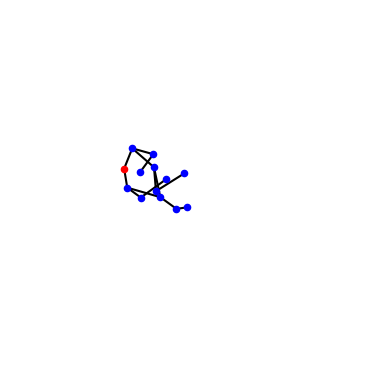

fall


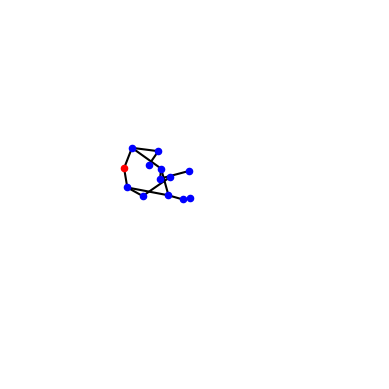

fall


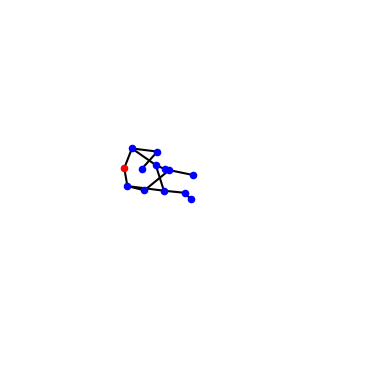

fall


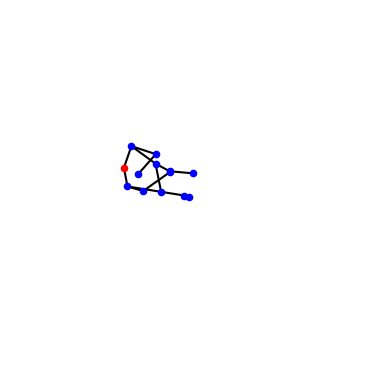

fall


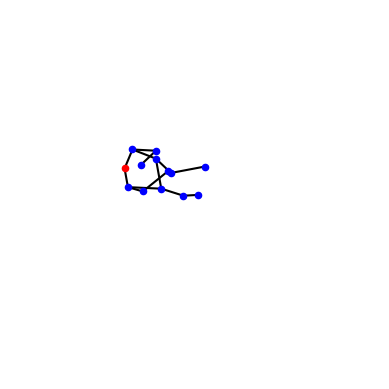

fall


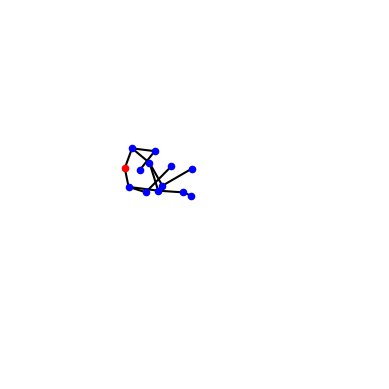

fall


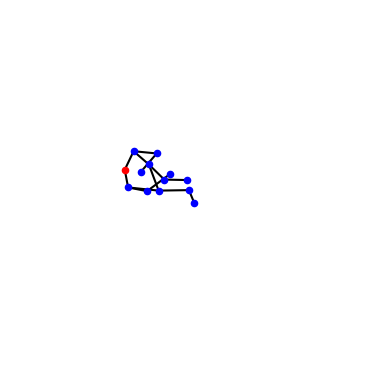

fall


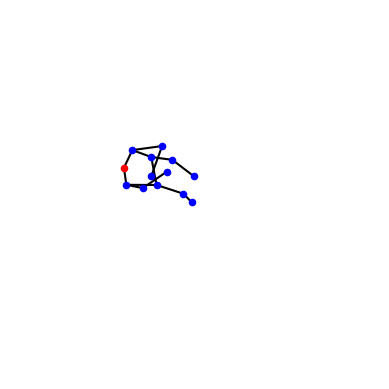

fall


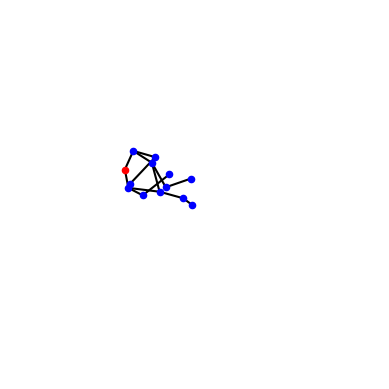

fall


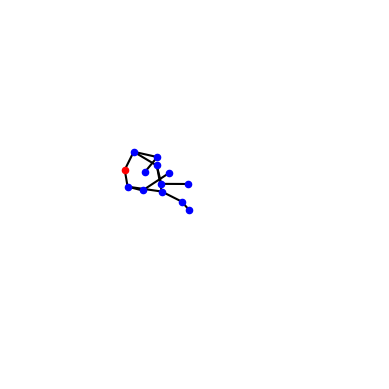

fall


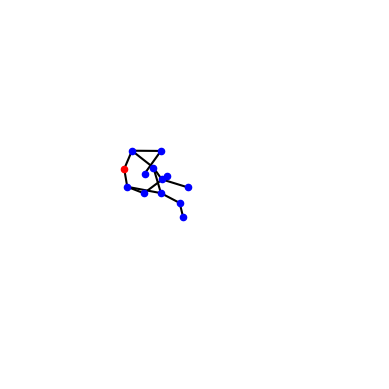

fall


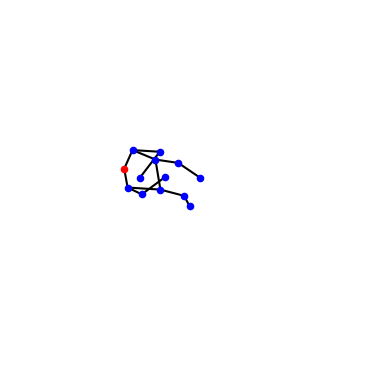

fall


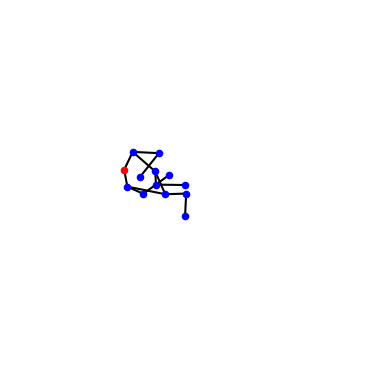

fall


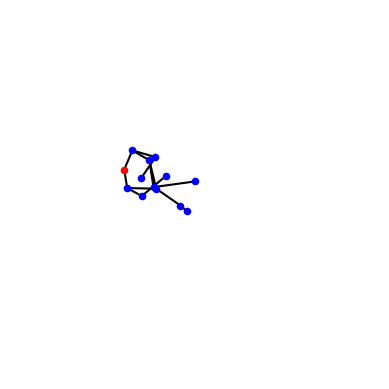

fall


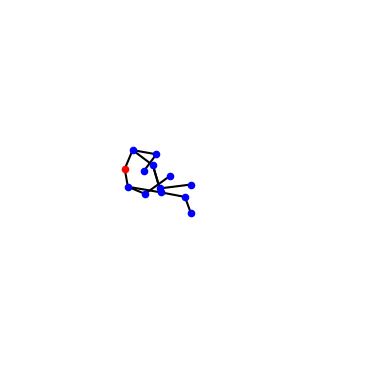

fall


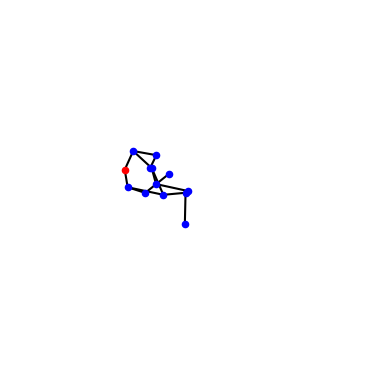

fall


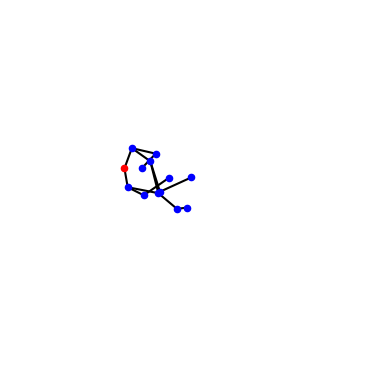

fall


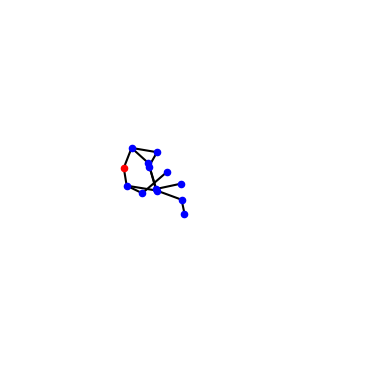

fall


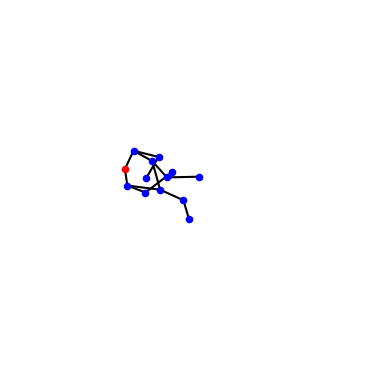

fall


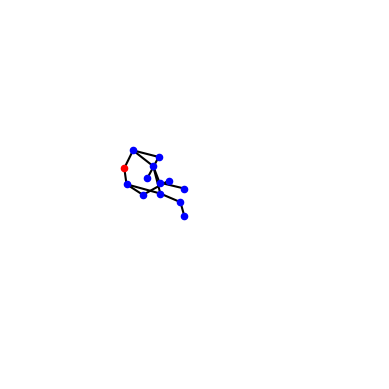

fall


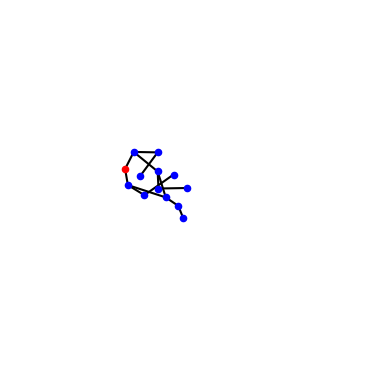

fall


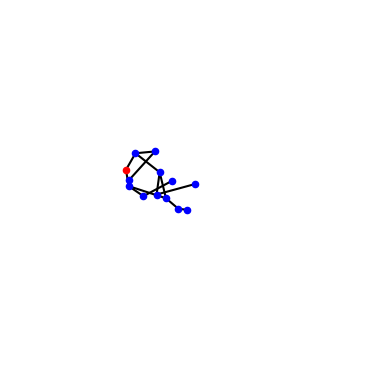

fall


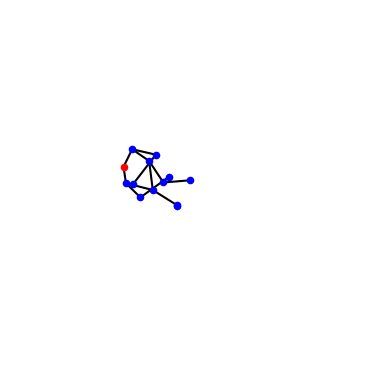

fall


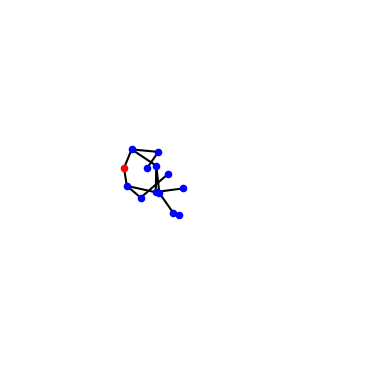

fall


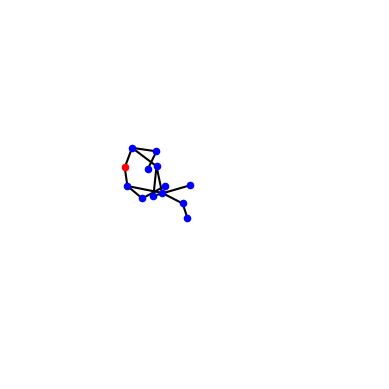

fall


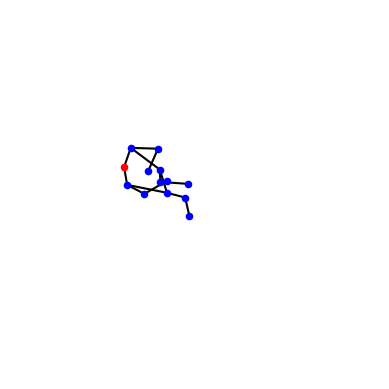

fall


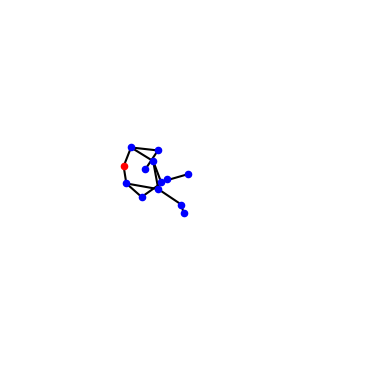

fall


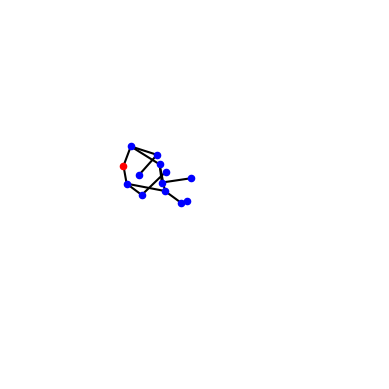

fall


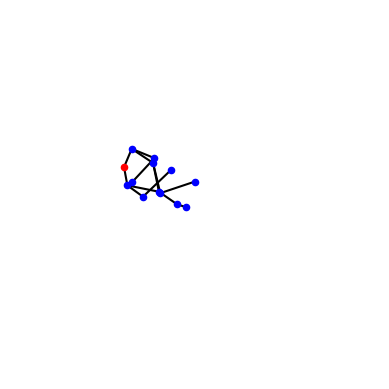

fall


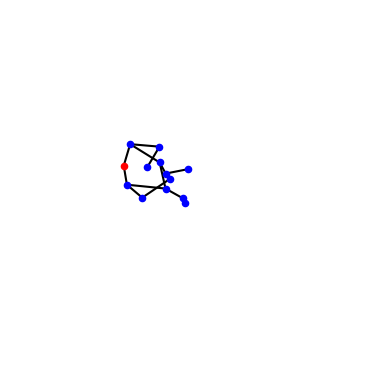

fall


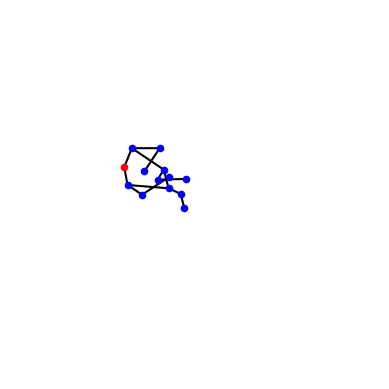

fall


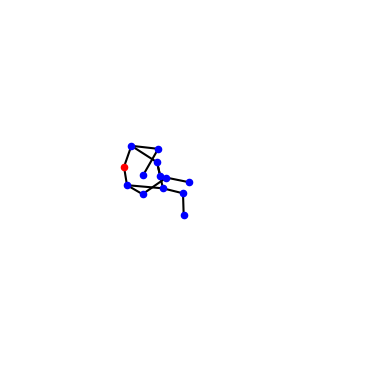

File /media/piai/NewVolume/AI_PROJECT/SceneEgo_folder/EgocentricDepthEstimator_ALL_SUCCESS/data/out/screenshot_259.jpg.pkl not found.


In [2]:
def extract_number(filename):
    match = re.search(r'\d+', filename)
    if match:
        return int(match.group())
    return 0  # 숫자가 없는 경우 0으로 처리합니다.

# 폴더에 있는 파일들 open음
for o in range(0,1000):
    time=o
    # Use f-string formatting for the filename
    filename = f'{pkl_filename}{o}.jpg.pkl'
    
    # Open and load the file
    try:
        with open(filename, 'rb') as file:
            loaded_data = pickle.load(file)
        
        # Convert loaded data to numpy array and print it
        loaded_data = np.array(loaded_data)
        loaded_data = list([x,y,1-z] for x,y,z in loaded_data)     
              
        heatmap_sequence = ["Neck", "Right_shoulder", "Right_elbow", "Right_wrist", "Left_shoulder", "Left_elbow",
                                "Left_wrist", "Right_hip", "Right_knee", "Right_ankle", "Right_foot", "Left_hip",
                                "Left_knee", "Left_ankle", "Left_foot"]
        
        sk_dict = dict(zip(heatmap_sequence,loaded_data))
        # print("sk_dict",sk_dict)

        lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
        
        dict_lines={}
        for i,j in lines:
            x1, y1, z1 = loaded_data[i]
            x2, y2, z2 = loaded_data[j]
            dict_lines['%s to %s'%(heatmap_sequence[i], heatmap_sequence[j])] = {'start_point' : [x1, y1, z1], 'end_point' :[x2, y2, z2]}
        # dict_lines

        dict_lines = {key_line:{k: list(map(float,v)) for k,v in v_line.items()} for key_line, v_line in dict_lines.items()}
        # json.dump(dict_lines, codecs.open(json_line_filename, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4) ### this saves the array in .json format
                 
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        i=0;  n=0
        
        for x,y,z in loaded_data:
            if i == n:
                ax.scatter3D(x,y,z, color='r' )# 3D scatter plot)
            elif i== 10 or i==14:
                i +=1
                continue
            else:
                ax.scatter3D(x,y,z,color='b')
            i +=1
        
        lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
                 (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
        for i,j in lines:
            x1, y1, z1 = loaded_data[i]
            x2, y2, z2 = loaded_data[j]
            if j in [10,14]:
                continue
            ax.plot([x1, x2], [y1, y2], [z1, z2], 'k-')  # 'b-'는 파란색 실선을 의미합니다.
        
        ax.set_xlim(-1,1);   ax.set_ylim(-1,1);   ax.set_zlim(-0.6,1)
        ax.set_axis_off()
        # ax.invert_zaxis()

        plt.grid(False)

        if time >= falldown_time:
            falldown_angle += 5
            print("fall")
        if falldown_angle >= 90:
            falldown_angle = 90
        ax.view_init(elev=None, azim=None, roll=falldown_angle )
    
        fig.savefig(f"{out_filename}{o}.png")
        plt.show()
        
    except FileNotFoundError:
        print(f"File {filename} not found.")
        break

In [3]:
import cv2
import os

images = [img for img in os.listdir(out_path) if img.endswith(".png")]
images = sorted(images, key=extract_number)

###### 연속적인 png 파일을 mp4로 MAKE ######
frame = cv2.imread(os.path.join(out_path, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_filename, cv2.VideoWriter_fourcc(*'DIVX'), 25, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(out_path, image)))

cv2.destroyAllWindows()
video.release()

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
